**Plate Detection and Extraction**

Image loaded successfully.
Image shape: (477, 720, 3)


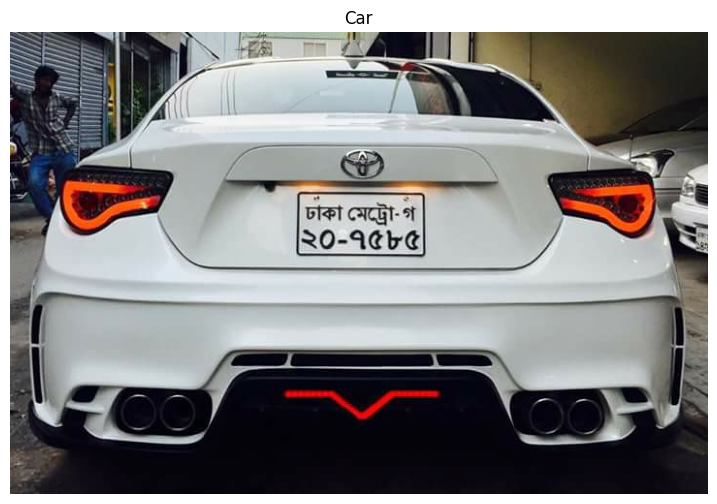

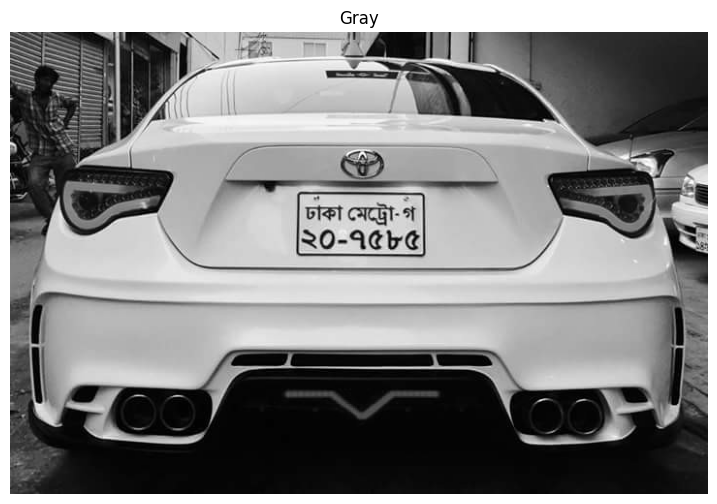

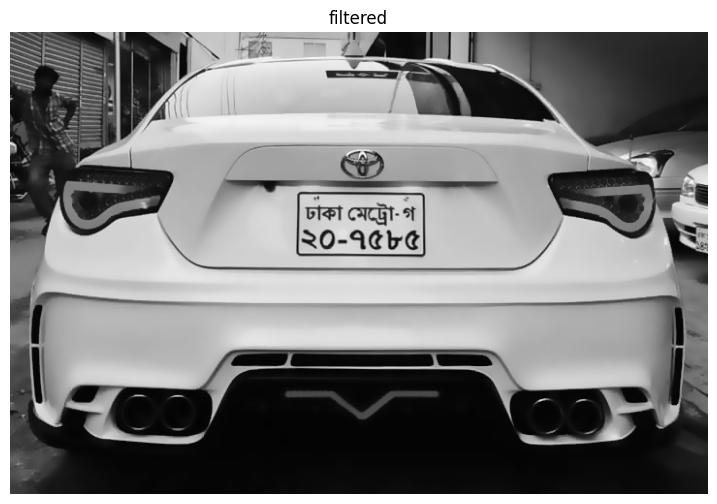

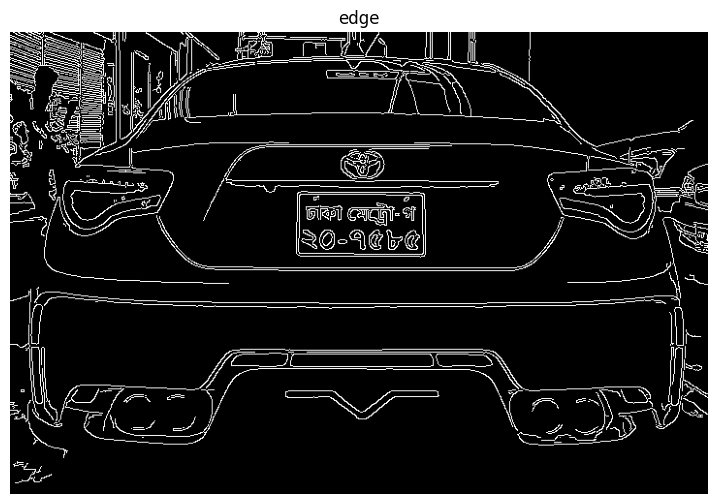

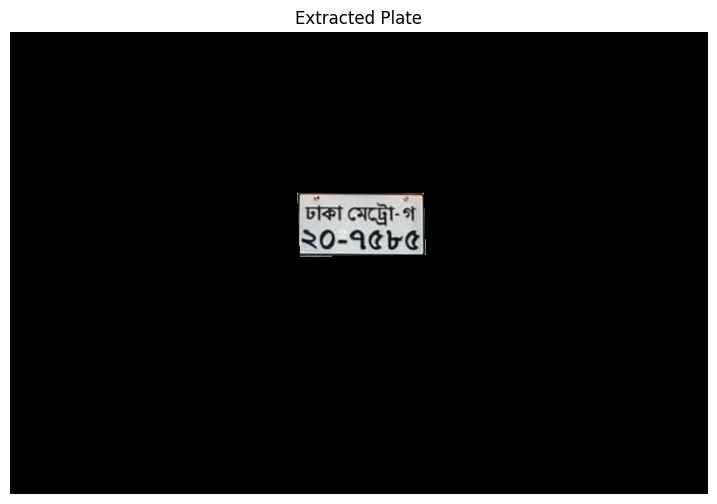

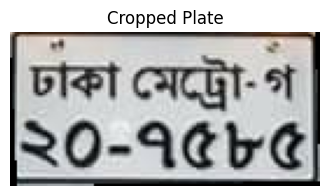

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

# Load the image
image_path = '/content/168.jpg'
image = cv2.imread(image_path)

# Check if the image is loaded properly
if image is None:
    print("Error: Image not loaded. Check the file path or file integrity.")
else:
    print("Image loaded successfully.")
    print(f"Image shape: {image.shape}")

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply bilateral filter to reduce noise
    filtered = cv2.bilateralFilter(gray, 11, 17, 17)

    # Perform edge detection using Canny
    edge = cv2.Canny(filtered, 30, 200)

    # Find contours
    contours = cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    location = None

    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break

    # Create a mask
    mask = np.zeros(gray.shape, np.uint8)
    extracted_plate = cv2.drawContours(mask, [location], 0, 255, -1)
    extracted_plate = cv2.bitwise_and(image, image, mask=mask)

    # Find bounding box coordinates
    (x, y, w, h) = cv2.boundingRect(location)

    # Crop the extracted plate from the image
    cropped_plate = extracted_plate[y:y+h, x:x+w]
  # Car
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Car")
    plt.axis('off')
    plt.show()
  # Car
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
    plt.title("Gray")
    plt.axis('off')
    plt.show()
      # Car
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))
    plt.title("filtered")
    plt.axis('off')
    plt.show()
  # Car
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))
    plt.title("edge")
    plt.axis('off')
    plt.show()
  # Display the extracted plate
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(extracted_plate, cv2.COLOR_BGR2RGB))
    plt.title("Extracted Plate")
    plt.axis('off')
    plt.show()
    # Display the cropped plate
    plt.figure(figsize=(4, 2))
    plt.imshow(cv2.cvtColor(cropped_plate, cv2.COLOR_BGR2RGB))
    plt.title("Cropped Plate")
    plt.axis('off')
    plt.show()


**Tilt Detection and Correcction**

In [ ]:
import cv2
import numpy as np

def tilt_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))

    M[0, 2] += (new_w / 2) - center[0]
    M[1, 2] += (new_h / 2) - center[1]

    tilted_image = cv2.warpAffine(image, M, (new_w, new_h))
    return tilted_image

# Load the original image
image_path = '/content/bplt.PNG'  # Replace with the actual image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not loaded. Please check the file path.")
else:
    # Tilt the image by 5 degrees and save it
    tilted_5 = tilt_image(image, 5)
    cv2.imwrite('/content/tilted_5.png', tilted_5)
    print("Saved tilted image with 5 degrees as 'tilted_5.png'.")

    # Tilt the image by 20 degrees and save it
    tilted_20 = tilt_image(image, 20)
    cv2.imwrite('/content/tilted_20.png', tilted_20)
    print("Saved tilted image with 20 degrees as 'tilted_20.png'.")


Saved tilted image with 5 degrees as 'tilted_5.png'.
Saved tilted image with 20 degrees as 'tilted_20.png'.



Processing image: /content/bplt.PNG
Image is not tilted.
Image /content/bplt.PNG is not tilted.


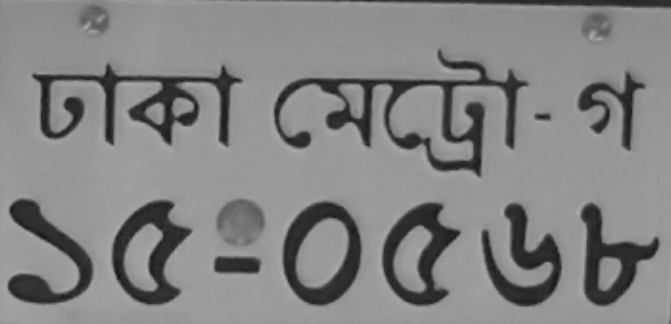


Processing image: /content/tilted_5.png
Tilt detected with angle: -5.00 degrees. Correcting...
Image /content/tilted_5.png was tilted by -5.00 degrees. Corrected.
Showing the tilted image:


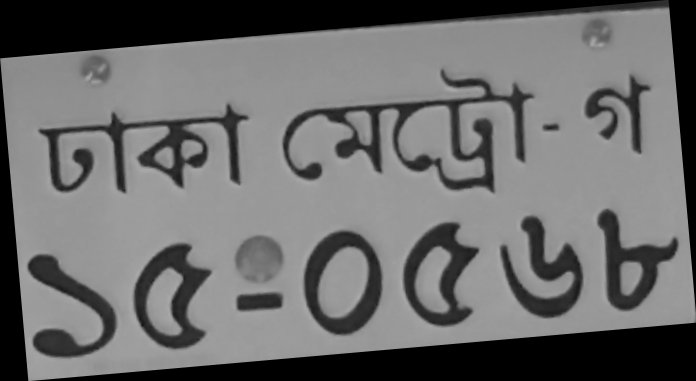

Showing the corrected image:


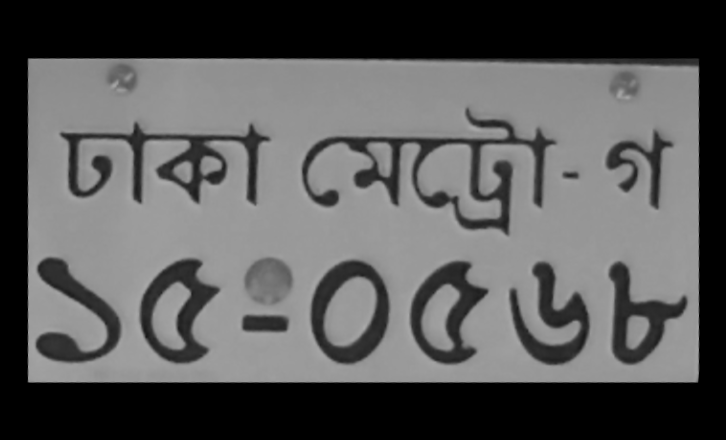


Processing image: /content/tilted_20.png
Tilt detected with angle: -20.00 degrees. Correcting...
Image /content/tilted_20.png was tilted by -20.00 degrees. Corrected.
Showing the tilted image:


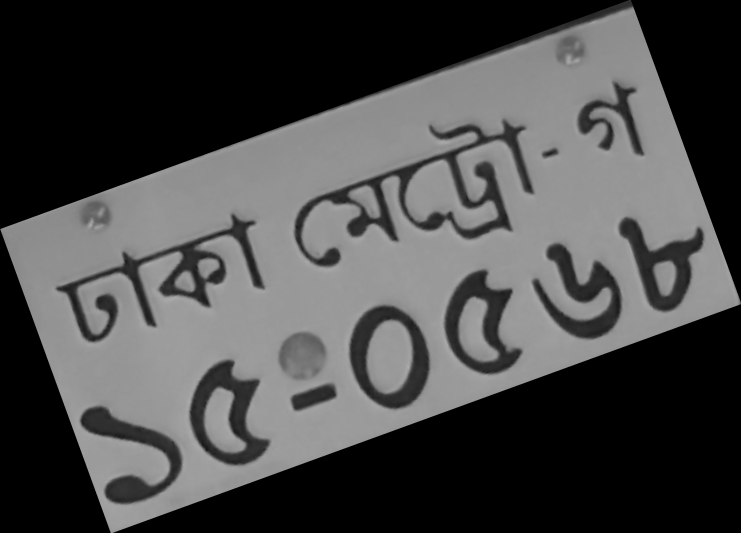

Showing the corrected image:


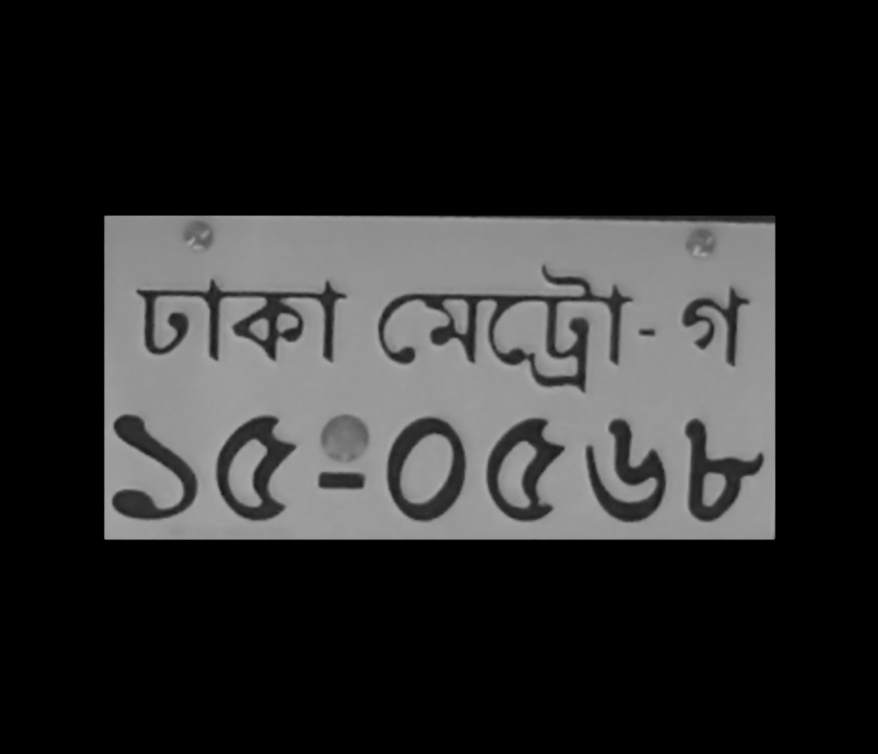

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow



def detect_tilt_and_correct(image, threshold=2):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)
    if lines is None:
        print("No significant lines detected. Assuming image is not tilted.")
        return image, 0

    # Extract angles, converting from radians to degrees
    angles = []
    for line in lines:
        rho, theta = line[0]
        # Convert to degrees
        angle = (theta - np.pi / 2) * (180 / np.pi)
        if -45 <= angle <= 45:  # Consider mostly horizontal lines
            angles.append(angle)

    if not angles:
        print("No valid lines detected for tilt correction.")
        return image, 0

    # Use median for stability
    median_angle = np.median(angles)

    if abs(median_angle) > threshold:
        print(f"Tilt detected with angle: {median_angle-.5:.2f} degrees. Correcting...")
        corrected_image = tilt_image(image, median_angle-.5)
        return corrected_image, median_angle-.5
    else:
        print("Image is not tilted.")
        return image, 0

# List of image paths
image_paths = ['/content/bplt.PNG', '/content/tilted_5.png', '/content/tilted_20.png']

# Process each image
for path in image_paths:
    print(f"\nProcessing image: {path}")
    image = cv2.imread(path)

    if image is None:
        print(f"Error: Unable to load image from {path}. Please check the file path.")
        continue

    # Detect and correct tilt
    corrected_image, detected_tilt_angle = detect_tilt_and_correct(image)

    # Display results
    if detected_tilt_angle == 0:
        print(f"Image {path} is not tilted.")
        cv2_imshow(image)
    else:
        print(f"Image {path} was tilted by {detected_tilt_angle:.2f} degrees. Corrected.")
        print("Showing the tilted image:")
        cv2_imshow(image)  # Show tilted image
        print("Showing the corrected image:")
        cv2_imshow(corrected_image)  # Show corrected image


In [ ]:
import cv2
import numpy as np

def tilt_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))

    M[0, 2] += (new_w / 2) - center[0]
    M[1, 2] += (new_h / 2) - center[1]

    tilted_image = cv2.warpAffine(image, M, (new_w, new_h))
    return tilted_image

# Load the original image
image_path = '/content/bplt.PNG'  # Replace with the actual image path
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not loaded. Please check the file path.")
else:
    # # Tilt the image by 15 degrees and save it
    # tilted_15 = tilt_image(image, 15)
    # cv2.imwrite('/content/tilted_15.png', tilted_15)
    # print("Saved tilted image with 15 degrees as 'tilted_15.png'.")

    # Tilt the image by 2 degrees and save it
    tilted_2 = tilt_image(image, 2)
    cv2.imwrite('/content/tilted_2.png', tilted_2)
    print("Saved tilted image with 2 degrees as 'tilted_2.png'.")


Saved tilted image with 2 degrees as 'tilted_2.png'.



Processing image: /content/bplt.PNG
Image is not tilted.
Image /content/bplt.PNG is not tilted.


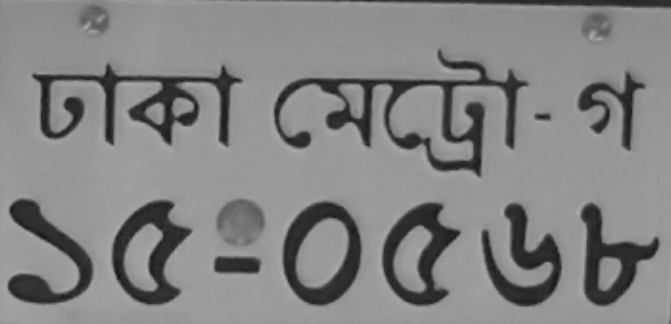


Processing image: /content/tilted_2.png
Image is not tilted.
Image /content/tilted_2.png is not tilted.


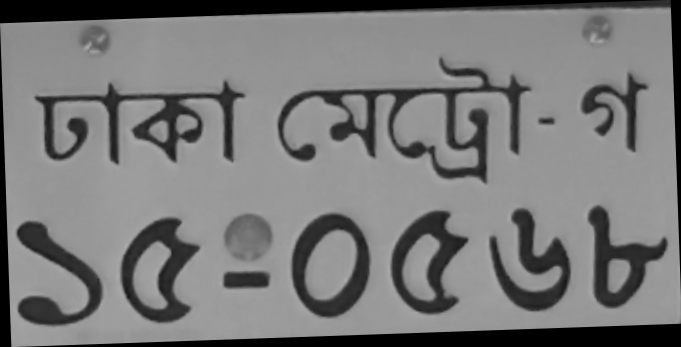

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def tilt_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))

    M[0, 2] += (new_w / 2) - center[0]
    M[1, 2] += (new_h / 2) - center[1]

    tilted_image = cv2.warpAffine(image, M, (new_w, new_h))
    return tilted_image

def detect_tilt_and_correct(image, threshold=2):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)
    if lines is None:
        print("No significant lines detected. Assuming image is not tilted.")
        return image, 0

    # Extract angles, converting from radians to degrees
    angles = []
    for line in lines:
        rho, theta = line[0]
        # Convert to degrees
        angle = (theta - np.pi / 2) * (180 / np.pi)
        if -45 <= angle <= 45:  # Consider mostly horizontal lines
            angles.append(angle)

    if not angles:
        print("No valid lines detected for tilt correction.")
        return image, 0

    # Use median for stability
    median_angle = np.median(angles)

    if abs(median_angle) > threshold:
        print(f"Tilt detected with angle: {median_angle:.2f} degrees. Correcting...")
        corrected_image = tilt_image(image, median_angle)
        return corrected_image, median_angle
    else:
        print("Image is not tilted.")
        return image, 0

# List of image paths
image_paths = ['/content/bplt.PNG', '/content/tilted_2.png']

# Process each image
for path in image_paths:
    print(f"\nProcessing image: {path}")
    image = cv2.imread(path)

    if image is None:
        print(f"Error: Unable to load image from {path}. Please check the file path.")
        continue

    # Detect and correct tilt
    corrected_image, detected_tilt_angle = detect_tilt_and_correct(image)

    # Display results
    if detected_tilt_angle == 0:
        print(f"Image {path} is not tilted.")
        cv2_imshow(image)
    else:
        print(f"Image {path} was tilted by {detected_tilt_angle:.2f} degrees. Corrected.")
        print("Showing the tilted image:")
        cv2_imshow(image)  # Show tilted image
        print("Showing the corrected image:")
        cv2_imshow(corrected_image)  # Show corrected image


**Post Processing **

Saving bplt.PNG to bplt (1).PNG


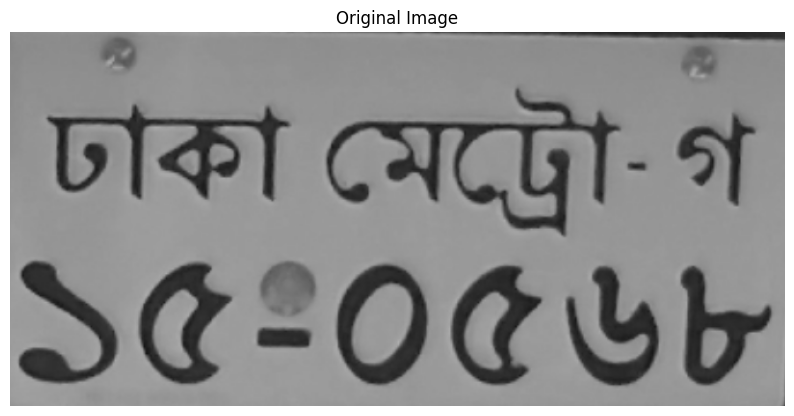

In [ ]:
!pip install opencv-python-headless matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
def display_image(image, title=''):
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

uploaded = files.upload()
image_path = next(iter(uploaded))
image = cv2.imread('/content/bplt.PNG')
display_image(image, 'Original Image')


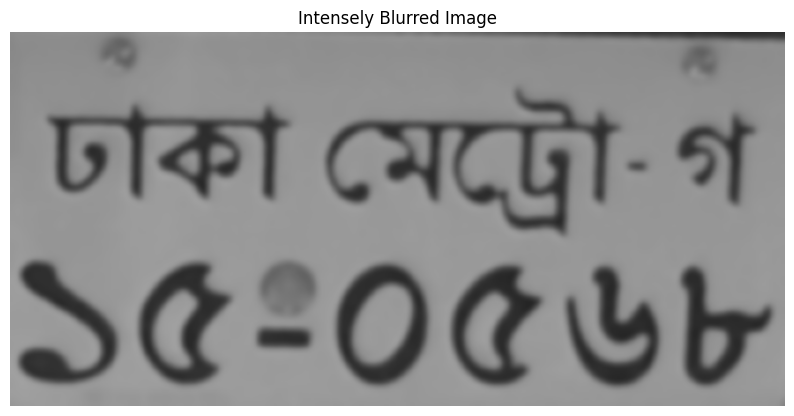

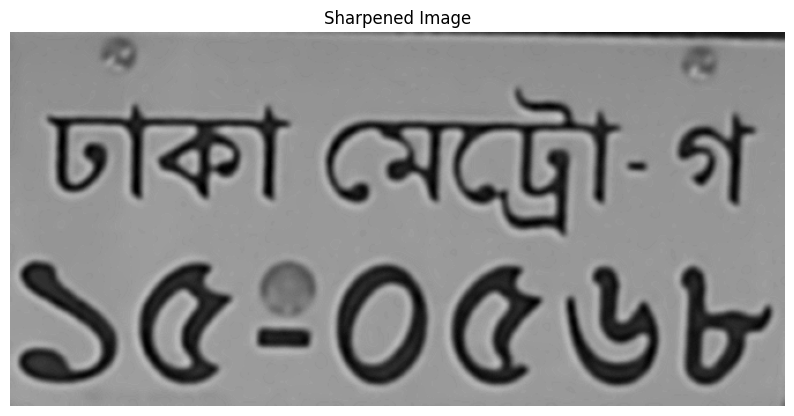

In [ ]:
# Function to apply intense blur to the image
def intense_blur_image(image, ksize=(15, 15)):
    intense_blurred_image = cv2.GaussianBlur(image, ksize, 0)
    return intense_blurred_image

# Function to apply Unsharp Masking for sharpening the image
def unsharp_mask(image, sigma=2.5, strength=3.5):
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    sharpened_image = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)
    return sharpened_image

# Apply intense blur to the image
intense_blurred_image = intense_blur_image(image)
display_image(intense_blurred_image, 'Intensely Blurred Image')

# Sharpen the intensely blurred image using Unsharp Masking
sharpened_image = unsharp_mask(intense_blurred_image)
display_image(sharpened_image, 'Sharpened Image')


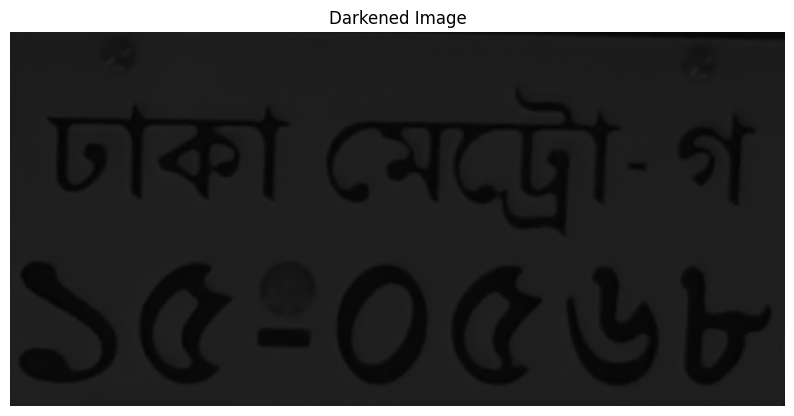

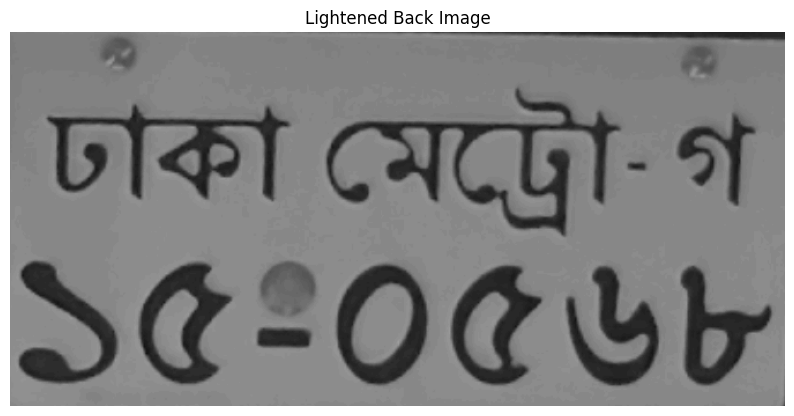

In [ ]:
# Function to darken the image
def darken_image(image, factor=.2):
    darkened_image = cv2.convertScaleAbs(image, alpha=factor, beta=0)
    return darkened_image

# Function to lighten the image
def lighten_image(image, factor=4.5):
    lightened_image = cv2.convertScaleAbs(image, alpha=factor, beta=0)
    return lightened_image

# Darken the image
darkened_image = darken_image(image)
display_image(darkened_image, 'Darkened Image')

# Lighten the darkened image back
lightened_image = lighten_image(darkened_image)
display_image(lightened_image, 'Lightened Back Image')


ESR-GAN Enhancement

In [ ]:
# Clone Real-ESRGAN repository
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN

# Install necessary packages
!pip install basicsr facexlib gfpgan
!pip install -r requirements.txt
!python setup.py develop

# Download the pre-trained ESRGAN model
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models

# Upgrade PyTorch and Torchvision to avoid compatibility issues
!pip install --upgrade torch torchvision
%cd ..


Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 759, done.
remote: Total 759 (delta 0), reused 0 (delta 0), pack-reused 759 (from 1)
Receiving objects: 100% (759/759), 5.39 MiB | 21.21 MiB/s, done.
Resolving deltas: 100% (408/408), done.
/content/Real-ESRGAN
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 22.8 MB/s eta 0:00:00
  Crea

In [ ]:
# Set up folders for uploaded and result images
%cd Real-ESRGAN
import os
from google.colab import files
import shutil

upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# Upload images
uploaded = files.upload()
for filename in uploaded.keys():
    dst_path = os.path.join(upload_folder, filename)
    print(f'move {filename} to {dst_path}')
    shutil.move(filename, dst_path)
%cd ..


/content/Real-ESRGAN


Saving ch.jpg to ch.jpg
move ch.jpg to upload/ch.jpg
/content


In [ ]:
# Modify degradations.py to change the import that caused the error
!sed -i 's/from torchvision.transforms.functional_tensor/from torchvision.transforms.functional/g' /usr/local/lib/python3.10/dist-packages/basicsr/data/degradations.py
# Run ESRGAN on the uploaded image
%cd Real-ESRGAN
!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 4 --face_enhance
%cd ..


/content/Real-ESRGAN
Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth" to /content/Real-ESRGAN/weights/RealESRGAN_x4plus.pth

100% 63.9M/63.9M [00:00<00:00, 335MB/s]
/content/Real-ESRGAN/realesrgan/utils.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where

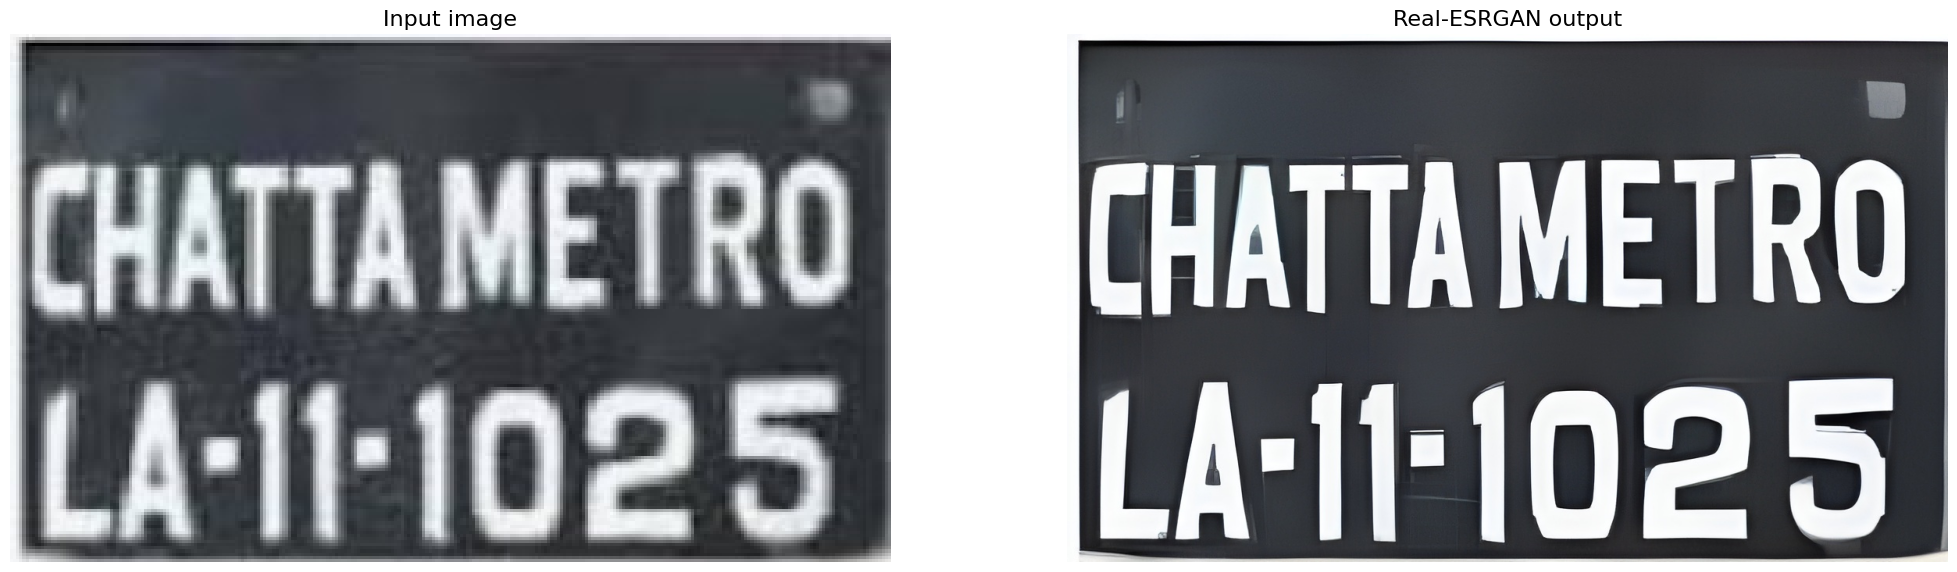

In [ ]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt
import os
import glob

# Function to display images side-by-side
def display(img1, img2):
    fig = plt.figure(figsize=(25, 10))
    ax1 = fig.add_subplot(1, 2, 1)
    plt.title('Input image', fontsize=16)
    ax1.axis('off')
    ax2 = fig.add_subplot(1, 2, 2)
    plt.title('Real-ESRGAN output', fontsize=16)
    ax2.axis('off')
    ax1.imshow(img1)
    ax2.imshow(img2)

# Function to read an image in RGB format
def imread(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Paths for input and output folders
input_folder = 'Real-ESRGAN/upload'
result_folder = 'Real-ESRGAN/results'

# Get list of input and output image paths
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))

# Loop through each pair of images and display them side-by-side
for input_path, output_path in zip(input_list, output_list):
    img_input = imread(input_path)
    img_output = imread(output_path)
    display(img_input, img_output)


In [ ]:
#@markdown # **5) Download Super Enhanced Image**

from google.colab import files

filename= os.listdir('/content/Real-ESRGAN/results')
files.download('/content/Real-ESRGAN/results/'+filename[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Application of inversion if application , Segmentation and extration **

Detected dark background. Inverting colors.


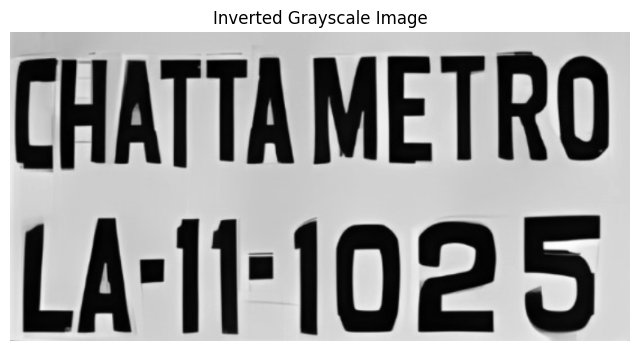

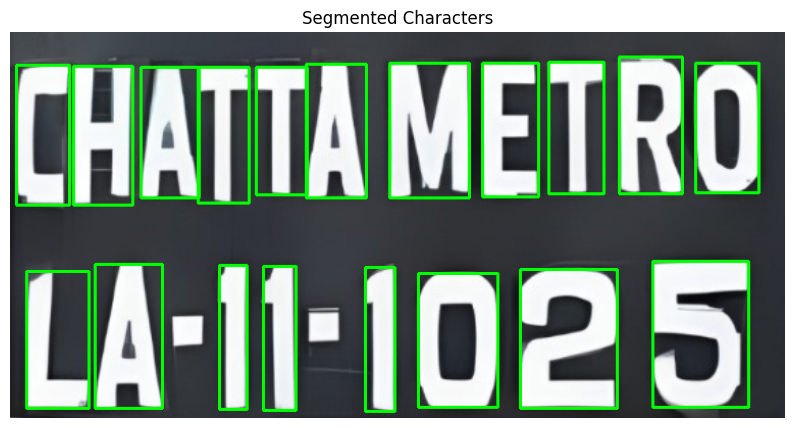

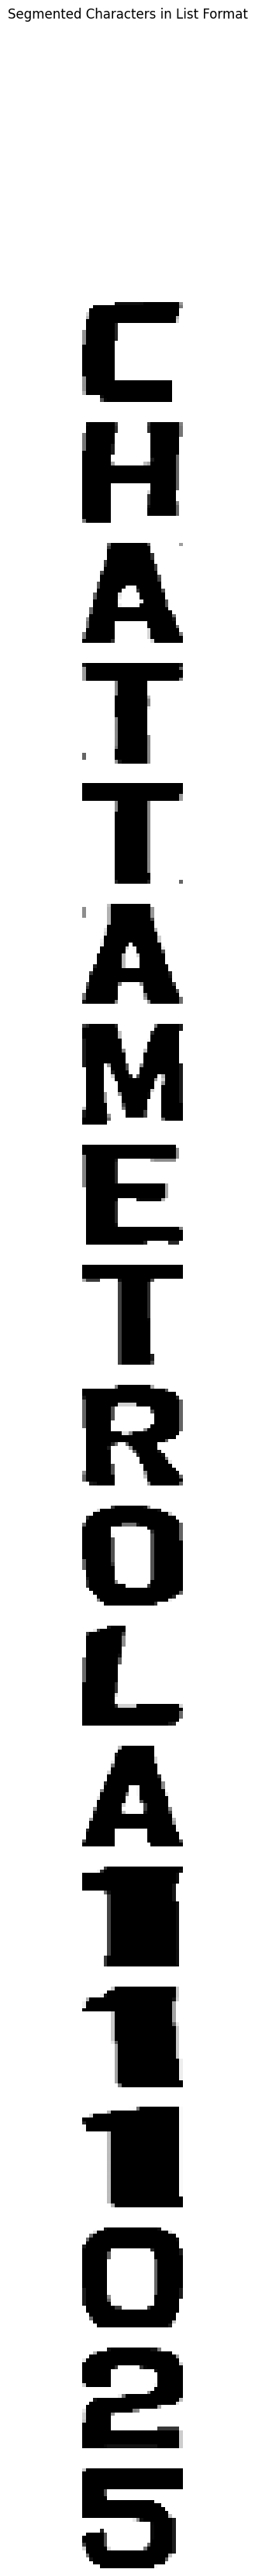

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import functools

# Load the image from the provided path
image_path = '/content/enbn.PNG'  # Update this path to your image location
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image from {image_path}")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Check the background intensity to determine whether to invert
    bg_intensity = np.mean(gray[:10, :10])  # Average intensity of the top-left corner

    # Invert the image if the background is dark
    if bg_intensity < 127:
        print("Detected dark background. Inverting colors.")
        gray = cv2.bitwise_not(gray)

        # Show the inverted grayscale image
        plt.figure(figsize=(8, 6))
        plt.imshow(gray, cmap='gray')
        plt.title('Inverted Grayscale Image')
        plt.axis('off')
        plt.show()
    else:
        print("Detected light background. Proceeding without inversion.")

        # Show the original grayscale image
        plt.figure(figsize=(8, 6))
        plt.imshow(gray, cmap='gray')
        plt.title('Original Grayscale Image')
        plt.axis('off')
        plt.show()

    # Apply Gaussian blurring to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding to get binary image
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 15)

    # Perform connected components analysis on the thresholded image
    _, labels = cv2.connectedComponents(thresh)
    mask = np.zeros(thresh.shape, dtype="uint8")

    # Set lower and upper bound criteria for character sizes
    total_pixels = image.shape[0] * image.shape[1]
    lower = total_pixels // 150  # Increased lower bound for smaller characters
    upper = total_pixels // 10   # Increased upper bound for larger characters

    # Loop over the unique components and filter them based on pixel count
    for (i, label) in enumerate(np.unique(labels)):
        if label == 0:
            continue

        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)

        if numPixels > lower and numPixels < upper:
            mask = cv2.add(mask, labelMask)

    # Find contours and get bounding boxes
    cnts, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]

    # Sort bounding boxes from left to right and top to bottom
    def compare(rect1, rect2):
        if abs(rect1[1] - rect2[1]) > 15:
            return rect1[1] - rect2[1]
        else:
            return rect1[0] - rect2[0]

    boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare))

    # Draw bounding boxes on the image
    for (x, y, w, h) in boundingBoxes:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the original image with bounding boxes
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Characters')
    plt.axis('off')
    plt.show()

    # Extract, invert and store each segmented character in a list
    segmented_characters = []
    for (x, y, w, h) in boundingBoxes:
        char_img = thresh[y:y+h, x:x+w]

        # Ensure background is white and character is black
        inverted_char = cv2.bitwise_not(char_img)

        # Resize to uniform dimensions if necessary (e.g., 28x28 for ML models)
        resized_char = cv2.resize(inverted_char, (28, 28))

        segmented_characters.append(resized_char)

    # Display each segmented character individually in a list format
    plt.figure(figsize=(5, 2 * len(segmented_characters)))
    for i, img in enumerate(segmented_characters):
        plt.subplot(len(segmented_characters), 1, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle('Segmented Characters in List Format')
    plt.show()

    # segmented_characters now contains each character as an isolated black-on-white image for further comparison


Detected light background. Proceeding without inversion.


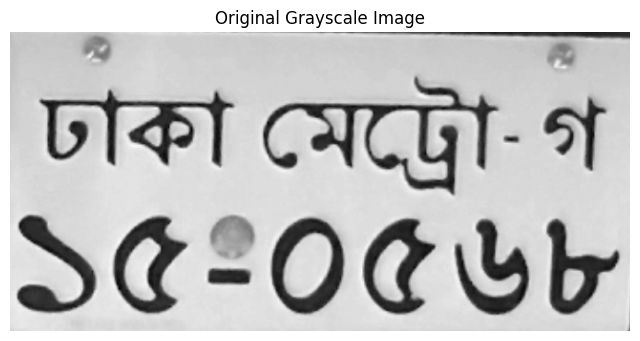

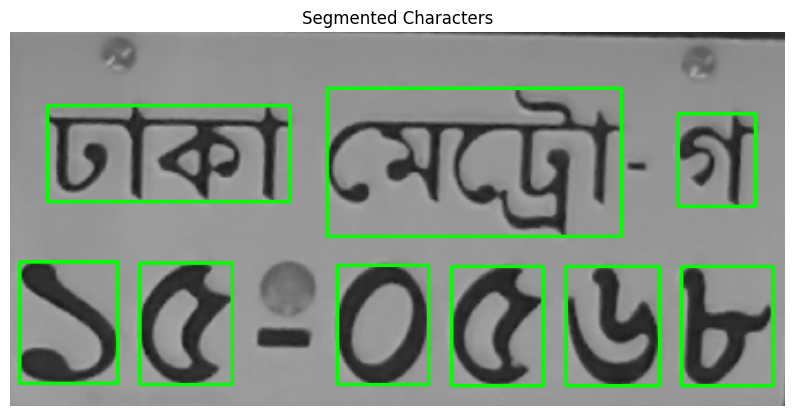

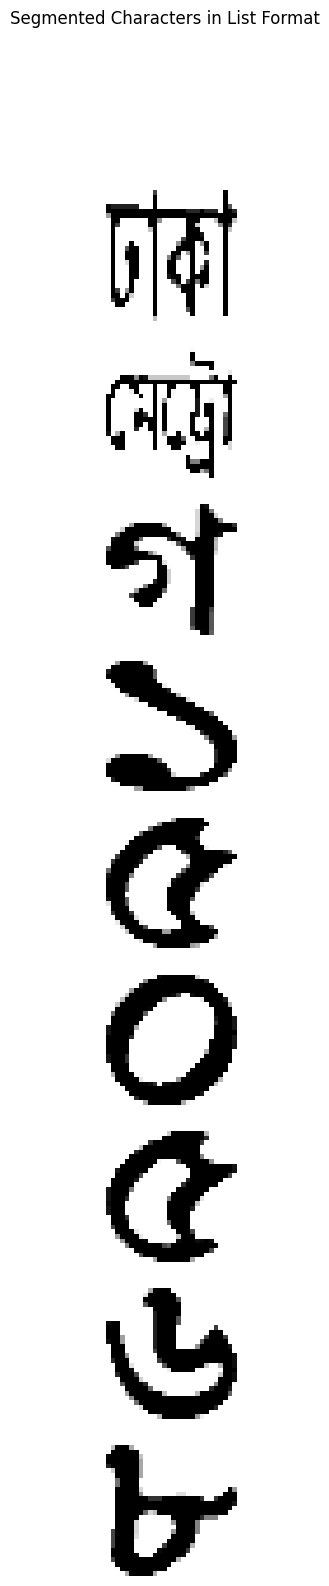

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import functools

# Load the image from the provided path
image_path = '/content/bplt.PNG'  # Update this path to your image location
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image from {image_path}")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Check the background intensity to determine whether to invert
    bg_intensity = np.mean(gray[:10, :10])  # Average intensity of the top-left corner

    # Invert the image if the background is dark
    if bg_intensity < 127:
        print("Detected dark background. Inverting colors.")
        gray = cv2.bitwise_not(gray)

        # Show the inverted grayscale image
        plt.figure(figsize=(8, 6))
        plt.imshow(gray, cmap='gray')
        plt.title('Inverted Grayscale Image')
        plt.axis('off')
        plt.show()
    else:
        print("Detected light background. Proceeding without inversion.")

        # Show the original grayscale image
        plt.figure(figsize=(8, 6))
        plt.imshow(gray, cmap='gray')
        plt.title('Original Grayscale Image')
        plt.axis('off')
        plt.show()

    # Apply Gaussian blurring to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding to get binary image
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 15)

    # Perform connected components analysis on the thresholded image
    _, labels = cv2.connectedComponents(thresh)
    mask = np.zeros(thresh.shape, dtype="uint8")

    # Set lower and upper bound criteria for character sizes
    total_pixels = image.shape[0] * image.shape[1]
    lower = total_pixels // 150  # Increased lower bound for smaller characters
    upper = total_pixels // 10   # Increased upper bound for larger characters

    # Loop over the unique components and filter them based on pixel count
    for (i, label) in enumerate(np.unique(labels)):
        if label == 0:
            continue

        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)

        if numPixels > lower and numPixels < upper:
            mask = cv2.add(mask, labelMask)

    # Find contours and get bounding boxes
    cnts, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]

    # Sort bounding boxes from left to right and top to bottom
    def compare(rect1, rect2):
        if abs(rect1[1] - rect2[1]) > 15:
            return rect1[1] - rect2[1]
        else:
            return rect1[0] - rect2[0]

    boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare))

    # Draw bounding boxes on the image
    for (x, y, w, h) in boundingBoxes:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the original image with bounding boxes
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Characters')
    plt.axis('off')
    plt.show()

    # Extract, invert and store each segmented character in a list
    segmented_characters = []
    for (x, y, w, h) in boundingBoxes:
        char_img = thresh[y:y+h, x:x+w]

        # Ensure background is white and character is black
        inverted_char = cv2.bitwise_not(char_img)

        # Resize to uniform dimensions if necessary (e.g., 28x28 for ML models)
        resized_char = cv2.resize(inverted_char, (28, 28))

        segmented_characters.append(resized_char)

    # Display each segmented character individually in a list format
    plt.figure(figsize=(5, 2 * len(segmented_characters)))
    for i, img in enumerate(segmented_characters):
        plt.subplot(len(segmented_characters), 1, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle('Segmented Characters in List Format')
    plt.show()

    # segmented_characters now contains each character as an isolated black-on-white image for further comparison


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Total segmented characters: 9


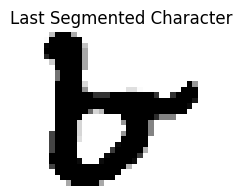

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
The better prediction is from the Bangla Model.
Predicted class: 8
Confidence: 0.9999


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the two models
model_bn = load_model('/content/bn_num.h5')  # Bangla number recognition model
model_en = load_model('/content/en_num.h5')  # English number recognition model

# Assuming `segmented_characters` is a list containing segmented character images
print(f"Total segmented characters: {len(segmented_characters)}")

# Retrieve the last segmented character (adjust index if needed)
last_character = segmented_characters[-1]

# Plot the last character
plt.figure(figsize=(2, 2))
plt.imshow(last_character, cmap='gray')
plt.title("Last Segmented Character")
plt.axis('off')
plt.show()

# Preprocess the last character for the models
# Resize the image to (64, 64)
resized_character = cv2.resize(last_character, (64, 64))

# Convert the image to grayscale and expand dimensions for grayscale models
if len(resized_character.shape) == 3 and resized_character.shape[-1] == 3:
    resized_character = cv2.cvtColor(resized_character, cv2.COLOR_RGB2GRAY)

# Normalize pixel values to range [0, 1]
normalized_character = resized_character / 255.0

# Reshape for model input: (64, 64, 1)
character_input = np.expand_dims(normalized_character, axis=-1)  # Add channel dimension
character_input = np.expand_dims(character_input, axis=0)       # Add batch dimension

# Make predictions using both models
prediction_bn = model_bn.predict(character_input)  # Bangla model
prediction_en = model_en.predict(character_input)  # English model

# Get confidence scores (maximum softmax probability) for each model
confidence_bn = np.max(prediction_bn)
confidence_en = np.max(prediction_en)

# Determine which model has better confidence
if confidence_bn > confidence_en:
    predicted_class = np.argmax(prediction_bn)
    model_name = "Bangla Model"
    confidence = confidence_bn
else:
    predicted_class = np.argmax(prediction_en)
    model_name = "English Model"
    confidence = confidence_en

# Print the result
print(f"The better prediction is from the {model_name}.")
print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.4f}")


Total segmented characters: 9


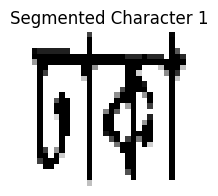

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Segment 1: Predicted class is 11
Class probabilities: [[1.6571570e-06 1.0636494e-08 2.9290950e-07 4.8104062e-07 3.7299597e-07
  7.0370345e-07 1.5077804e-07 6.0093875e-08 2.8525213e-07 5.8833955e-08
  3.0441592e-07 9.9993467e-01 3.2436634e-05 1.4010986e-08 5.9002634e-08
  2.4623162e-06 9.0897845e-07 1.7856019e-07 8.1133500e-08 6.9899210e-07
  1.0464787e-05 4.9618131e-07 3.6040888e-07 2.5067763e-07 4.4752900e-07
  2.6946118e-06 1.9188491e-07 2.8891120e-07 1.5170410e-06 7.2213197e-06
  2.9496633e-08]]


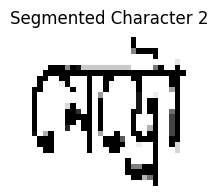

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Segment 2: Predicted class is 12
Class probabilities: [[1.29437558e-10 6.99477490e-11 1.60855596e-09 3.56227003e-09
  3.76752275e-11 2.61916294e-10 4.03289034e-11 9.79772374e-11
  5.93189831e-10 1.41229362e-10 1.02718639e-10 6.98165026e-10
  9.99999642e-01 7.69499742e-12 1.12909548e-09 3.22375993e-09
  3.02207894e-08 1.62600211e-10 4.20094404e-09 2.10952877e-09
  1.18862495e-07 1.22615007e-09 2.24069563e-09 3.99118766e-10
  8.76908546e-10 1.55039792e-09 5.82726783e-11 3.19734861e-09
  3.57676277e-10 2.34851797e-07 3.41137358e-08]]


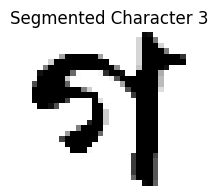

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Segment 3: Predicted class is 17
Class probabilities: [[3.0193776e-05 1.9041832e-05 5.5398280e-04 6.9132504e-05 1.6543214e-05
  1.6735748e-05 6.3360902e-05 1.0824261e-04 2.6394495e-05 2.3554352e-05
  1.1169659e-04 6.2233943e-07 7.3276379e-07 2.3178918e-05 2.0332994e-04
  3.8134952e-03 8.1291379e-05 9.7468114e-01 1.6052947e-05 1.4726806e-04
  1.9460078e-02 5.7979596e-05 5.8426034e-05 1.0519776e-04 6.0482049e-05
  4.6041609e-06 1.7071162e-06 3.1012141e-07 3.4128502e-06 4.1468131e-05
  2.0026391e-04]]


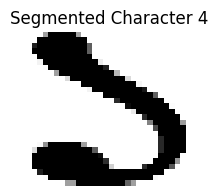

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Segment 4: Predicted class is 1
Class probabilities: [[6.4895896e-05 9.8583972e-01 3.5887570e-06 8.0454367e-04 2.1202129e-03
  5.2812748e-04 3.0518536e-04 4.6674562e-05 7.1900650e-03 1.9830928e-04
  2.8666460e-03 6.1777752e-09 7.9217441e-09 1.8172129e-06 2.1716342e-06
  2.7582146e-07 8.6628670e-06 3.3863605e-06 4.2774391e-06 9.4674181e-07
  3.8058554e-06 3.0308433e-07 2.6227787e-07 1.1320257e-06 1.1309359e-06
  5.9963963e-07 5.7337832e-08 1.3344382e-07 3.4953965e-07 2.2781546e-06
  5.3516521e-07]]


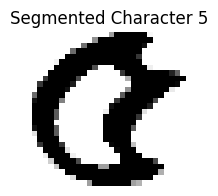

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Segment 5: Predicted class is 6
Class probabilities: [[6.2821838e-03 1.3216573e-02 3.1627613e-04 2.8820535e-02 3.4449507e-02
  2.2407614e-02 8.3610934e-01 1.2979401e-02 1.0083086e-02 1.3350487e-02
  1.3667398e-02 1.8051289e-05 1.4462986e-05 5.2778813e-04 4.6174316e-04
  3.1018586e-04 1.0501397e-03 4.6693615e-04 8.3362398e-04 4.5477442e-04
  4.2873732e-04 5.5111741e-04 4.5823550e-04 4.1672596e-04 7.4189488e-04
  1.8257968e-04 1.0015510e-04 5.2653551e-05 1.1638377e-04 8.9338125e-04
  2.3814697e-04]]


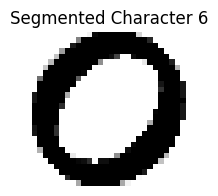

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Segment 6: Predicted class is 0
Class probabilities: [[9.5284551e-01 1.0476274e-02 1.7333303e-05 8.0204895e-03 3.5513975e-03
  1.2052373e-03 8.8177519e-03 1.6871976e-03 4.5076218e-03 1.7766702e-03
  6.5531060e-03 5.2667683e-06 3.0346150e-06 4.7048728e-05 4.8419002e-05
  3.6554993e-05 2.3724599e-05 5.2939846e-05 2.5107760e-05 2.2678127e-05
  3.8561120e-05 2.0140989e-05 2.0507761e-05 2.5792355e-05 3.0007383e-05
  1.4915517e-05 8.4115709e-06 3.9453498e-06 1.3138216e-05 7.7939672e-05
  2.3289722e-05]]


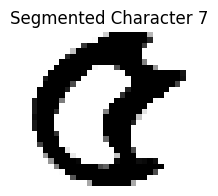

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Segment 7: Predicted class is 6
Class probabilities: [[6.5242792e-03 2.0408254e-02 4.5978409e-04 3.9552931e-02 3.4564648e-02
  3.1006955e-02 7.9458952e-01 1.3755047e-02 1.1155160e-02 2.0082051e-02
  1.6307773e-02 2.8189384e-05 2.4260202e-05 6.8011106e-04 5.4964778e-04
  3.8558940e-04 1.4755941e-03 6.1300397e-04 1.2540893e-03 6.1726820e-04
  5.3784996e-04 6.4916140e-04 5.9669226e-04 5.8383337e-04 9.4404386e-04
  2.5178705e-04 1.4046118e-04 7.4854346e-05 1.8270459e-04 1.6918124e-03
  3.1249458e-04]]


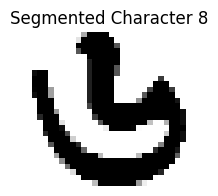

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Segment 8: Predicted class is 7
Class probabilities: [[3.31003859e-04 3.70821194e-03 3.66466003e-04 9.26298648e-03
  2.74815573e-03 1.86112747e-02 5.59926219e-03 9.08832669e-01
  3.68850259e-03 1.79803744e-02 2.54823919e-02 1.10969313e-05
  1.05303970e-05 1.39862183e-04 2.69394048e-04 1.61083124e-04
  1.09400120e-04 1.97833346e-04 2.77996965e-04 1.26187806e-04
  4.82286938e-04 2.03930336e-04 1.13373877e-04 8.54288810e-05
  4.74146364e-04 1.13976406e-04 8.66460105e-05 3.72926479e-05
  9.25857457e-05 2.29047931e-04 1.66598416e-04]]


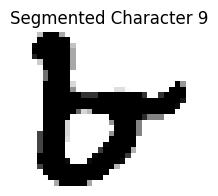

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Segment 9: Predicted class is 9
Class probabilities: [[1.35772507e-05 1.63622585e-03 4.95150425e-06 2.98471452e-04
  4.08728840e-04 8.73496683e-05 2.08544871e-03 2.57251348e-04
  1.78262673e-03 9.92809772e-01 5.19424677e-04 6.36942721e-09
  1.08773737e-08 4.27649638e-07 6.19637285e-06 1.01623607e-06
  2.25712593e-05 1.50828055e-05 1.93321430e-05 1.33284198e-06
  7.75262833e-06 4.54355632e-06 1.29537921e-06 5.21094717e-06
  1.49054426e-06 6.37574203e-07 3.52508778e-07 1.70178026e-07
  2.45850572e-07 6.18006106e-06 2.48880201e-06]]
Predicted classes for all segmented characters: [11, 12, 17, 1, 6, 0, 6, 7, 9]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the pre-trained model (adjust the path to your .h5 file)
# model_path = '/content/drive/MyDrive/LicenseData/bangla_recog/twoBangDataset/balancedDataset/english_all.h5'
model_path = '/content/drive/MyDrive/LicenseData/thesisModel/Bangla_allFin.h5'
model = load_model(model_path)

# Assuming `segmented_characters` is a list containing segmented character images
# Example: segmented_characters = [char1_img, char2_img, ..., charN_img]

# Print the total number of segmented characters
print(f"Total segmented characters: {len(segmented_characters)}")

# Initialize a list to store predictions
predictions = []

# Iterate over all segmented characters
for i, character in enumerate(segmented_characters):
    # Display each segmented character
    plt.figure(figsize=(2, 2))
    plt.imshow(character, cmap='gray')
    plt.title(f"Segmented Character {i + 1}")
    plt.axis('off')
    plt.show()

    # Preprocess the character for the CNN model
    # Resize the image to (64, 64) - adjust size based on your model's expected input dimensions
    resized_character = cv2.resize(character, (64, 64))

    # If the image is grayscale (1 channel), convert to 3-channel RGB
    if len(resized_character.shape) == 2 or resized_character.shape[-1] == 1:
        character_rgb = cv2.cvtColor(resized_character, cv2.COLOR_GRAY2RGB)
    else:
        character_rgb = resized_character

    # Normalize the pixel values to the range [0, 1]
    normalized_character = character_rgb / 255.0

    # Add batch dimension to match model input shape: (1, 64, 64, 3)
    character_input = np.expand_dims(normalized_character, axis=0)

    # Make prediction using the model
    prediction = model.predict(character_input)

    # Interpret the model output (assuming softmax probabilities)
    predicted_class = np.argmax(prediction)

    # Print the predicted class and probabilities
    print(f"Segment {i + 1}: Predicted class is {predicted_class}")
    print(f"Class probabilities: {prediction}")

    # Append the prediction to the list
    predictions.append(predicted_class)

# Final output of all predictions
print("Predicted classes for all segmented characters:", predictions)


Total segmented characters: 9


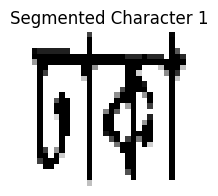

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step
Segment 1: Predicted class index is 11, Class name is Dhaka
Class probabilities: [[1.6571570e-06 1.0636494e-08 2.9290950e-07 4.8104062e-07 3.7299597e-07
  7.0370345e-07 1.5077804e-07 6.0093875e-08 2.8525213e-07 5.8833955e-08
  3.0441592e-07 9.9993467e-01 3.2436634e-05 1.4010986e-08 5.9002634e-08
  2.4623162e-06 9.0897845e-07 1.7856019e-07 8.1133500e-08 6.9899210e-07
  1.0464787e-05 4.9618131e-07 3.6040888e-07 2.5067763e-07 4.4752900e-07
  2.6946118e-06 1.9188491e-07 2.8891120e-07 1.5170410e-06 7.2213197e-06
  2.9496633e-08]]


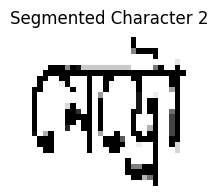

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Segment 2: Predicted class index is 12, Class name is Metro
Class probabilities: [[1.29437558e-10 6.99477490e-11 1.60855596e-09 3.56227003e-09
  3.76752275e-11 2.61916294e-10 4.03289034e-11 9.79772374e-11
  5.93189831e-10 1.41229362e-10 1.02718639e-10 6.98165026e-10
  9.99999642e-01 7.69499742e-12 1.12909548e-09 3.22375993e-09
  3.02207894e-08 1.62600211e-10 4.20094404e-09 2.10952877e-09
  1.18862495e-07 1.22615007e-09 2.24069563e-09 3.99118766e-10
  8.76908546e-10 1.55039792e-09 5.82726783e-11 3.19734861e-09
  3.57676277e-10 2.34851797e-07 3.41137358e-08]]


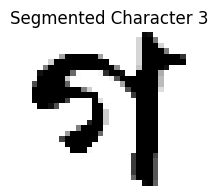

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Segment 3: Predicted class index is 17, Class name is ga
Class probabilities: [[3.0193776e-05 1.9041832e-05 5.5398280e-04 6.9132504e-05 1.6543214e-05
  1.6735748e-05 6.3360902e-05 1.0824261e-04 2.6394495e-05 2.3554352e-05
  1.1169659e-04 6.2233943e-07 7.3276379e-07 2.3178918e-05 2.0332994e-04
  3.8134952e-03 8.1291379e-05 9.7468114e-01 1.6052947e-05 1.4726806e-04
  1.9460078e-02 5.7979596e-05 5.8426034e-05 1.0519776e-04 6.0482049e-05
  4.6041609e-06 1.7071162e-06 3.1012141e-07 3.4128502e-06 4.1468131e-05
  2.0026391e-04]]


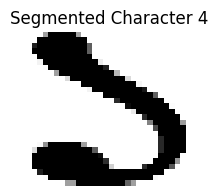

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Segment 4: Predicted class index is 1, Class name is 1
Class probabilities: [[6.4895896e-05 9.8583972e-01 3.5887570e-06 8.0454367e-04 2.1202129e-03
  5.2812748e-04 3.0518536e-04 4.6674562e-05 7.1900650e-03 1.9830928e-04
  2.8666460e-03 6.1777752e-09 7.9217441e-09 1.8172129e-06 2.1716342e-06
  2.7582146e-07 8.6628670e-06 3.3863605e-06 4.2774391e-06 9.4674181e-07
  3.8058554e-06 3.0308433e-07 2.6227787e-07 1.1320257e-06 1.1309359e-06
  5.9963963e-07 5.7337832e-08 1.3344382e-07 3.4953965e-07 2.2781546e-06
  5.3516521e-07]]


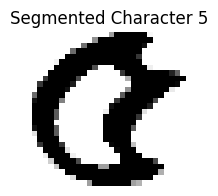

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Segment 5: Predicted class index is 6, Class name is 5
Class probabilities: [[6.2821838e-03 1.3216573e-02 3.1627613e-04 2.8820535e-02 3.4449507e-02
  2.2407614e-02 8.3610934e-01 1.2979401e-02 1.0083086e-02 1.3350487e-02
  1.3667398e-02 1.8051289e-05 1.4462986e-05 5.2778813e-04 4.6174316e-04
  3.1018586e-04 1.0501397e-03 4.6693615e-04 8.3362398e-04 4.5477442e-04
  4.2873732e-04 5.5111741e-04 4.5823550e-04 4.1672596e-04 7.4189488e-04
  1.8257968e-04 1.0015510e-04 5.2653551e-05 1.1638377e-04 8.9338125e-04
  2.3814697e-04]]


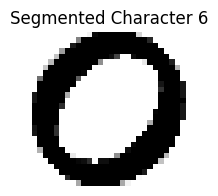

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Segment 6: Predicted class index is 0, Class name is 0
Class probabilities: [[9.5284551e-01 1.0476274e-02 1.7333303e-05 8.0204895e-03 3.5513975e-03
  1.2052373e-03 8.8177519e-03 1.6871976e-03 4.5076218e-03 1.7766702e-03
  6.5531060e-03 5.2667683e-06 3.0346150e-06 4.7048728e-05 4.8419002e-05
  3.6554993e-05 2.3724599e-05 5.2939846e-05 2.5107760e-05 2.2678127e-05
  3.8561120e-05 2.0140989e-05 2.0507761e-05 2.5792355e-05 3.0007383e-05
  1.4915517e-05 8.4115709e-06 3.9453498e-06 1.3138216e-05 7.7939672e-05
  2.3289722e-05]]


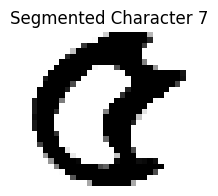

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Segment 7: Predicted class index is 6, Class name is 5
Class probabilities: [[6.5242792e-03 2.0408254e-02 4.5978409e-04 3.9552931e-02 3.4564648e-02
  3.1006955e-02 7.9458952e-01 1.3755047e-02 1.1155160e-02 2.0082051e-02
  1.6307773e-02 2.8189384e-05 2.4260202e-05 6.8011106e-04 5.4964778e-04
  3.8558940e-04 1.4755941e-03 6.1300397e-04 1.2540893e-03 6.1726820e-04
  5.3784996e-04 6.4916140e-04 5.9669226e-04 5.8383337e-04 9.4404386e-04
  2.5178705e-04 1.4046118e-04 7.4854346e-05 1.8270459e-04 1.6918124e-03
  3.1249458e-04]]


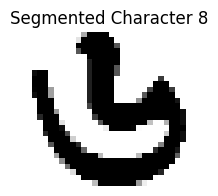

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Segment 8: Predicted class index is 7, Class name is 6
Class probabilities: [[3.31003859e-04 3.70821194e-03 3.66466003e-04 9.26298648e-03
  2.74815573e-03 1.86112747e-02 5.59926219e-03 9.08832669e-01
  3.68850259e-03 1.79803744e-02 2.54823919e-02 1.10969313e-05
  1.05303970e-05 1.39862183e-04 2.69394048e-04 1.61083124e-04
  1.09400120e-04 1.97833346e-04 2.77996965e-04 1.26187806e-04
  4.82286938e-04 2.03930336e-04 1.13373877e-04 8.54288810e-05
  4.74146364e-04 1.13976406e-04 8.66460105e-05 3.72926479e-05
  9.25857457e-05 2.29047931e-04 1.66598416e-04]]


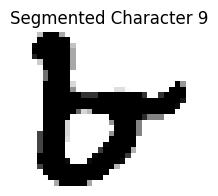

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Segment 9: Predicted class index is 9, Class name is 8
Class probabilities: [[1.35772507e-05 1.63622585e-03 4.95150425e-06 2.98471452e-04
  4.08728840e-04 8.73496683e-05 2.08544871e-03 2.57251348e-04
  1.78262673e-03 9.92809772e-01 5.19424677e-04 6.36942721e-09
  1.08773737e-08 4.27649638e-07 6.19637285e-06 1.01623607e-06
  2.25712593e-05 1.50828055e-05 1.93321430e-05 1.33284198e-06
  7.75262833e-06 4.54355632e-06 1.29537921e-06 5.21094717e-06
  1.49054426e-06 6.37574203e-07 3.52508778e-07 1.70178026e-07
  2.45850572e-07 6.18006106e-06 2.48880201e-06]]
Predicted classes for all segmented characters: ['Dhaka', 'Metro', 'ga', '1', '5', '0', '5', '6', '8']


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the pre-trained model (adjust the path to your .h5 file)
model_path = '/content/drive/MyDrive/LicenseData/thesisModel/Bangla_allFin.h5'
model = load_model(model_path)

# Define the index to class name mapping
index_to_class = {
    0: '0', 1: '1', 2: '10', 3: '2', 4: '3', 5: '4', 6: '5', 7: '6', 8: '7', 9: '8',
    10: '9', 11: 'Dhaka', 12: 'Metro', 13: 'ba', 14: 'ca', 15: 'cha', 16: 'e', 17: 'ga',
    18: 'gha', 19: 'ha', 20: 'i', 21: 'ja', 22: 'jha', 23: 'ka', 24: 'kha', 25: 'khulna',
    26: 'mymensingh', 27: 'narayanganj', 28: 'sylhet', 29: 'ttha', 30: 'u'
}

# Assuming `segmented_characters` is a list containing segmented character images
# Example: segmented_characters = [char1_img, char2_img, ..., charN_img]

# Print the total number of segmented characters
print(f"Total segmented characters: {len(segmented_characters)}")

# Initialize a list to store predictions
predictions = []

# Iterate over all segmented characters
for i, character in enumerate(segmented_characters):
    # Display each segmented character
    plt.figure(figsize=(2, 2))
    plt.imshow(character, cmap='gray')
    plt.title(f"Segmented Character {i + 1}")
    plt.axis('off')
    plt.show()

    # Preprocess the character for the CNN model
    # Resize the image to (64, 64) - adjust size based on your model's expected input dimensions
    resized_character = cv2.resize(character, (64, 64))

    # If the image is grayscale (1 channel), convert to 3-channel RGB
    if len(resized_character.shape) == 2 or resized_character.shape[-1] == 1:
        character_rgb = cv2.cvtColor(resized_character, cv2.COLOR_GRAY2RGB)
    else:
        character_rgb = resized_character

    # Normalize the pixel values to the range [0, 1]
    normalized_character = character_rgb / 255.0

    # Add batch dimension to match model input shape: (1, 64, 64, 3)
    character_input = np.expand_dims(normalized_character, axis=0)

    # Make prediction using the model
    prediction = model.predict(character_input)

    # Interpret the model output (assuming softmax probabilities)
    predicted_class_index = np.argmax(prediction)

    # Get the corresponding class name from the index
    predicted_class_name = index_to_class.get(predicted_class_index, "Unknown")

    # Print the predicted class and probabilities
    print(f"Segment {i + 1}: Predicted class index is {predicted_class_index}, Class name is {predicted_class_name}")
    print(f"Class probabilities: {prediction}")

    # Append the predicted class name to the list
    predictions.append(predicted_class_name)

# Final output of all predictions
print("Predicted classes for all segmented characters:", predictions)


english

Detected dark background. Inverting colors.


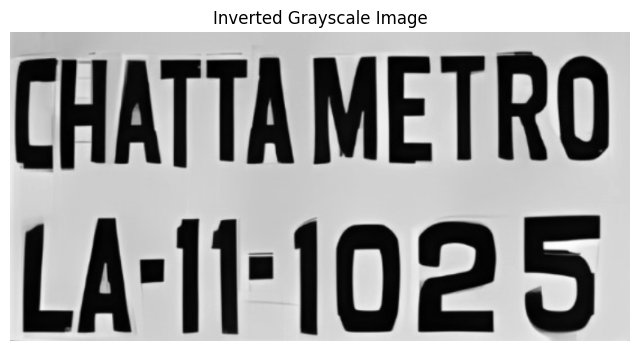

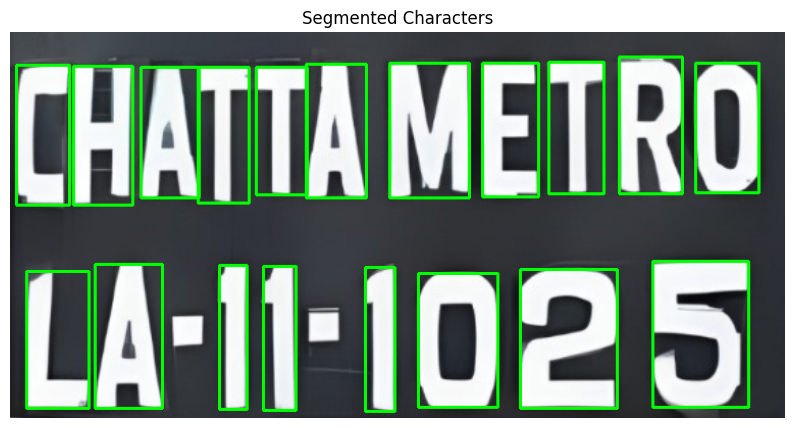

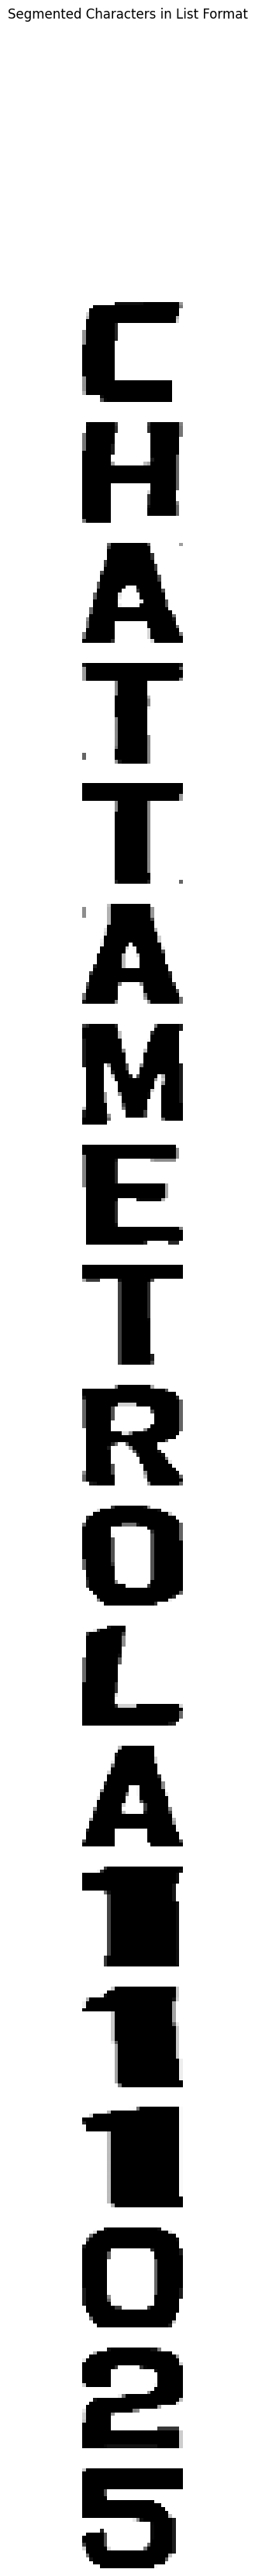

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import functools

# Load the image from the provided path
image_path = '/content/enbn.PNG'  # Update this path to your image location
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image from {image_path}")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Check the background intensity to determine whether to invert
    bg_intensity = np.mean(gray[:10, :10])  # Average intensity of the top-left corner

    # Invert the image if the background is dark
    if bg_intensity < 127:
        print("Detected dark background. Inverting colors.")
        gray = cv2.bitwise_not(gray)

        # Show the inverted grayscale image
        plt.figure(figsize=(8, 6))
        plt.imshow(gray, cmap='gray')
        plt.title('Inverted Grayscale Image')
        plt.axis('off')
        plt.show()
    else:
        print("Detected light background. Proceeding without inversion.")

        # Show the original grayscale image
        plt.figure(figsize=(8, 6))
        plt.imshow(gray, cmap='gray')
        plt.title('Original Grayscale Image')
        plt.axis('off')
        plt.show()

    # Apply Gaussian blurring to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding to get binary image
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 15)

    # Perform connected components analysis on the thresholded image
    _, labels = cv2.connectedComponents(thresh)
    mask = np.zeros(thresh.shape, dtype="uint8")

    # Set lower and upper bound criteria for character sizes
    total_pixels = image.shape[0] * image.shape[1]
    lower = total_pixels // 150  # Increased lower bound for smaller characters
    upper = total_pixels // 10   # Increased upper bound for larger characters

    # Loop over the unique components and filter them based on pixel count
    for (i, label) in enumerate(np.unique(labels)):
        if label == 0:
            continue

        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)

        if numPixels > lower and numPixels < upper:
            mask = cv2.add(mask, labelMask)

    # Find contours and get bounding boxes
    cnts, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]

    # Sort bounding boxes from left to right and top to bottom
    def compare(rect1, rect2):
        if abs(rect1[1] - rect2[1]) > 15:
            return rect1[1] - rect2[1]
        else:
            return rect1[0] - rect2[0]

    boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare))

    # Draw bounding boxes on the image
    for (x, y, w, h) in boundingBoxes:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the original image with bounding boxes
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Characters')
    plt.axis('off')
    plt.show()

    # Extract, invert and store each segmented character in a list
    segmented_characters = []
    for (x, y, w, h) in boundingBoxes:
        char_img = thresh[y:y+h, x:x+w]

        # Ensure background is white and character is black
        inverted_char = cv2.bitwise_not(char_img)

        # Resize to uniform dimensions if necessary (e.g., 28x28 for ML models)
        resized_char = cv2.resize(inverted_char, (28, 28))

        segmented_characters.append(resized_char)

    # Display each segmented character individually in a list format
    plt.figure(figsize=(5, 2 * len(segmented_characters)))
    for i, img in enumerate(segmented_characters):
        plt.subplot(len(segmented_characters), 1, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle('Segmented Characters in List Format')
    plt.show()

    # segmented_characters now contains each character as an isolated black-on-white image for further comparison


Total segmented characters: 19


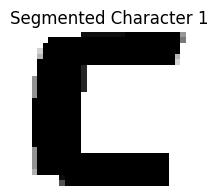

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


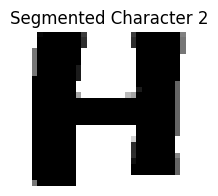

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


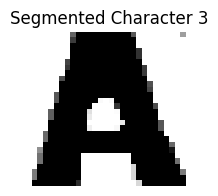

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


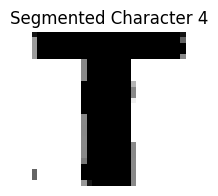

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


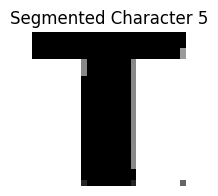

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


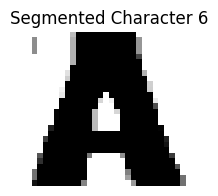

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


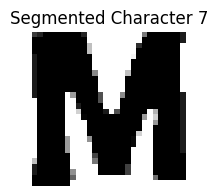

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


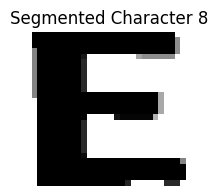

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


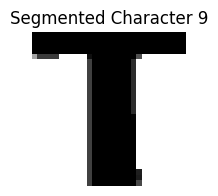

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


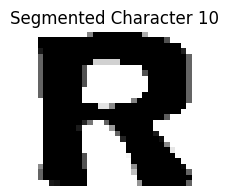

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


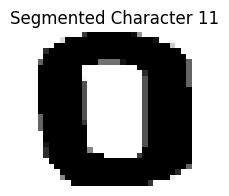

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


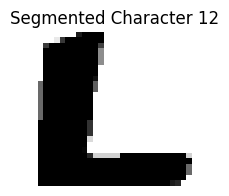

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


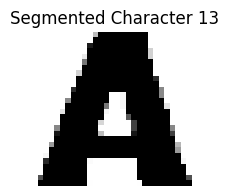

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


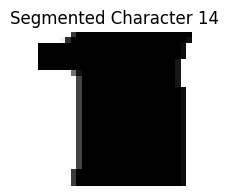

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


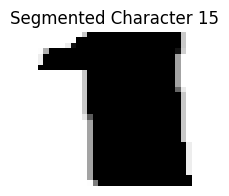

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


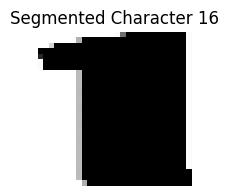

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


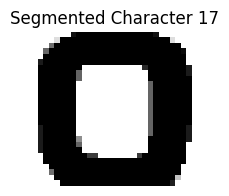

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


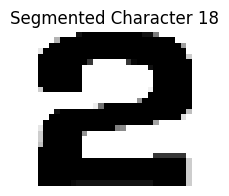

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


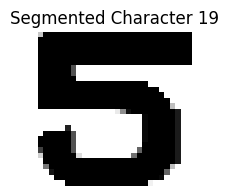

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Segment 1: Predicted class is 'F' (Index: 5)
Class probabilities: [[2.31478669e-04 6.17773767e-05 1.66697398e-01 1.59812695e-03
  1.45741459e-03 7.31263638e-01 4.79968777e-03 3.53284297e-04
  4.96393768e-04 3.16226884e-04 4.94440610e-04 9.08290409e-03
  8.01438873e-05 1.92331296e-04 4.29381253e-05 4.85921605e-03
  3.75673582e-04 2.29251455e-04 6.60144025e-04 1.46328155e-02
  1.04616192e-04 6.50983828e-04 6.33827702e-04 4.89351281e-04
  3.87209351e-04 8.09407560e-04 3.81551380e-03 2.54628807e-02
  3.50460131e-03 3.24843189e-04 3.11636599e-04 1.97577085e-02
  6.74330397e-04 4.03670361e-03 8.23089795e-04 2.88135780e-04]]

Segment 2: Predicted class is 'H' (Index: 7)
Class probabilities: [[3.3266674e-04 7.8556346e-05 1.3168810e-05 4.0183333e-04 1.5129825e-05
  3.1930979e-06 5.9296167e-06 9.9660313e-01 4.1208830e-05 6.8650802e-06
  1.7673931e-04 4.4694516e-06 2.3263028e-04 3.8639013e-05 7.3902855e-05
  1.6346907e-05 2.6571633e-05 3.9787625e-04 2.0234113

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the pre-trained model (adjust the path to your .h5 file)
model_path = '/content/drive/MyDrive/LicenseData/bangla_recog/twoBangDataset/balancedDataset/d_my_english_all.h5'
# model_path = '/content/drive/MyDrive/LicenseData/EngAll/frengAll.h5'
model = load_model(model_path)

# New class index to name mapping
index_to_class = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
    20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: '0', 27: '1',
    28: '2', 29: '3', 30: '4', 31: '5', 32: '6', 33: '7',
    34: '8', 35: '9'
}

# Assuming `segmented_characters` is a list containing segmented character images
# Example: segmented_characters = [char1_img, char2_img, ..., charN_img]

# Print the total number of segmented characters
print(f"Total segmented characters: {len(segmented_characters)}")

# Initialize a list to store predictions
predictions = []

# Initialize a string to hold all the results in the desired format
result_string = ""

# Iterate over all segmented characters
for i, character in enumerate(segmented_characters):
    # Display each segmented character
    plt.figure(figsize=(2, 2))
    plt.imshow(character, cmap='gray')
    plt.title(f"Segmented Character {i + 1}")
    plt.axis('off')
    plt.show()

    # Preprocess the character for the CNN model
    # Resize the image to (64, 64) - adjust size based on your model's expected input dimensions
    resized_character = cv2.resize(character, (64, 64))

    # If the image is grayscale (1 channel), convert to 3-channel RGB
    if len(resized_character.shape) == 2 or resized_character.shape[-1] == 1:
        character_rgb = cv2.cvtColor(resized_character, cv2.COLOR_GRAY2RGB)
    else:
        character_rgb = resized_character

    # Normalize the pixel values to the range [0, 1]
    normalized_character = character_rgb / 255.0

    # Add batch dimension to match model input shape: (1, 64, 64, 3)
    character_input = np.expand_dims(normalized_character, axis=0)

    # Make prediction using the model
    prediction = model.predict(character_input)

    # Interpret the model output (assuming softmax probabilities)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = index_to_class[predicted_class_index]

    # Prepare the result for this segment
    result_string += f"Segment {i + 1}: Predicted class is '{predicted_class_name}' (Index: {predicted_class_index})\n"
    result_string += f"Class probabilities: {prediction}\n\n"

    # Append the prediction to the list
    predictions.append(predicted_class_name)

# Final output of all predictions in string format
result_string += "Predicted classes for all segmented characters:\n"
result_string += str(predictions)

# Print the final result string
print(result_string)


Some more test

Detected light background. Proceeding without inversion.


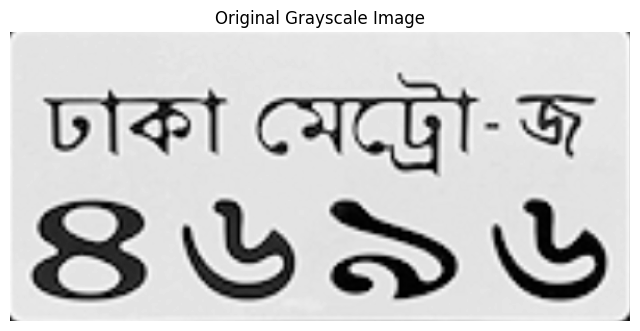

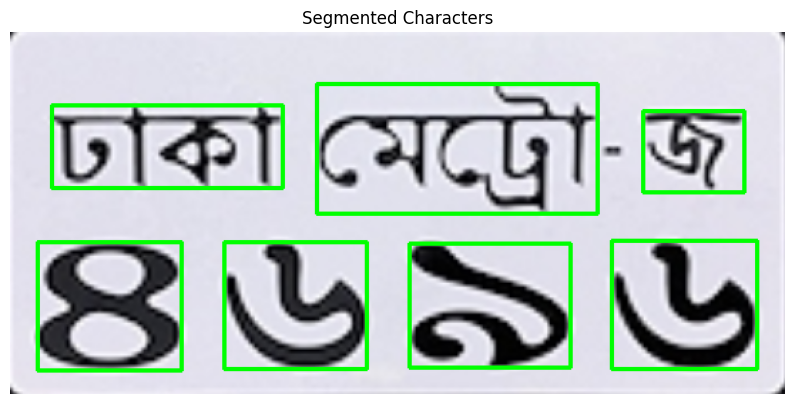

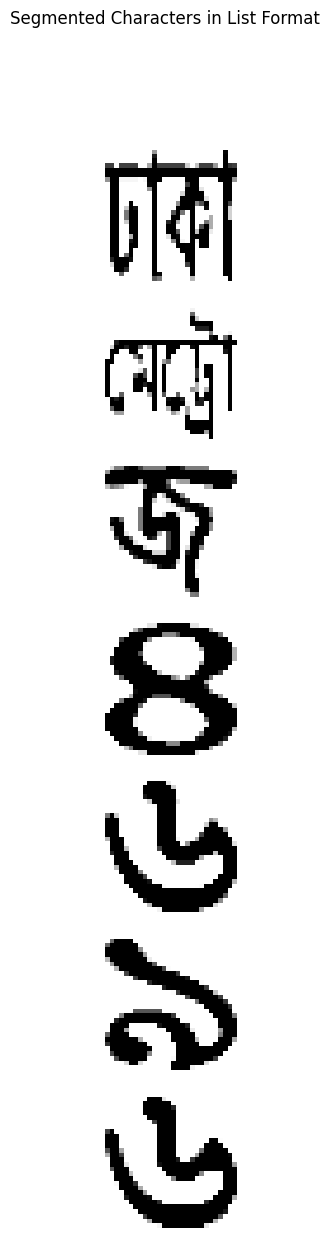

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import functools

# Load the image from the provided path
image_path = '/content/test5.PNG'  # Update this path to your image location
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image from {image_path}")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Check the background intensity to determine whether to invert
    bg_intensity = np.mean(gray[:10, :10])  # Average intensity of the top-left corner

    # Invert the image if the background is dark
    if bg_intensity < 127:
        print("Detected dark background. Inverting colors.")
        gray = cv2.bitwise_not(gray)

        # Show the inverted grayscale image
        plt.figure(figsize=(8, 6))
        plt.imshow(gray, cmap='gray')
        plt.title('Inverted Grayscale Image')
        plt.axis('off')
        plt.show()
    else:
        print("Detected light background. Proceeding without inversion.")

        # Show the original grayscale image
        plt.figure(figsize=(8, 6))
        plt.imshow(gray, cmap='gray')
        plt.title('Original Grayscale Image')
        plt.axis('off')
        plt.show()

    # Apply Gaussian blurring to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding to get binary image
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 15)

    # Perform connected components analysis on the thresholded image
    _, labels = cv2.connectedComponents(thresh)
    mask = np.zeros(thresh.shape, dtype="uint8")

    # Set lower and upper bound criteria for character sizes
    total_pixels = image.shape[0] * image.shape[1]
    lower = total_pixels // 150  # Increased lower bound for smaller characters
    upper = total_pixels // 10   # Increased upper bound for larger characters

    # Loop over the unique components and filter them based on pixel count
    for (i, label) in enumerate(np.unique(labels)):
        if label == 0:
            continue

        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)

        if numPixels > lower and numPixels < upper:
            mask = cv2.add(mask, labelMask)

    # Find contours and get bounding boxes
    cnts, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]

    # Sort bounding boxes from left to right and top to bottom
    def compare(rect1, rect2):
        if abs(rect1[1] - rect2[1]) > 15:
            return rect1[1] - rect2[1]
        else:
            return rect1[0] - rect2[0]

    boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare))

    # Draw bounding boxes on the image
    for (x, y, w, h) in boundingBoxes:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the original image with bounding boxes
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Characters')
    plt.axis('off')
    plt.show()

    # Extract, invert and store each segmented character in a list
    segmented_characters = []
    for (x, y, w, h) in boundingBoxes:
        char_img = thresh[y:y+h, x:x+w]

        # Ensure background is white and character is black
        inverted_char = cv2.bitwise_not(char_img)

        # Resize to uniform dimensions if necessary (e.g., 28x28 for ML models)
        resized_char = cv2.resize(inverted_char, (28, 28))

        segmented_characters.append(resized_char)

    # Display each segmented character individually in a list format
    plt.figure(figsize=(5, 2 * len(segmented_characters)))
    for i, img in enumerate(segmented_characters):
        plt.subplot(len(segmented_characters), 1, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle('Segmented Characters in List Format')
    plt.show()

    # segmented_characters now contains each character as an isolated black-on-white image for further comparison


Total segmented characters: 7


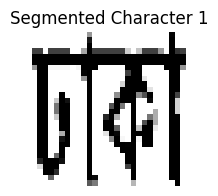

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step
Segment 1: Predicted class index is 11, Class name is Dhaka
Class probabilities: [[6.6439761e-06 2.0179317e-07 1.8305415e-06 5.3035501e-06 3.1421293e-06
  4.9005630e-06 1.6092736e-06 8.5540523e-07 1.8212135e-06 6.5638005e-07
  3.8795979e-06 9.9969745e-01 3.3562814e-05 3.0287194e-07 2.5890590e-06
  2.0568159e-05 5.0579183e-06 9.9961233e-07 9.8573889e-07 8.2672450e-06
  8.0214559e-05 4.3110076e-06 1.5112414e-05 2.0553930e-06 4.5973093e-06
  6.6226923e-05 3.0098581e-06 2.7118592e-06 9.0979338e-06 1.1866441e-05
  1.7484274e-07]]


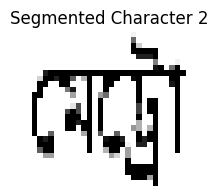

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Segment 2: Predicted class index is 12, Class name is Metro
Class probabilities: [[1.0092840e-11 1.2253888e-12 4.7358836e-11 2.2500658e-10 1.7255588e-12
  1.3241786e-11 1.9178426e-12 3.6164934e-12 4.3011213e-11 5.0608281e-12
  4.7065338e-12 3.6007544e-11 1.0000000e+00 2.5664632e-13 5.1957185e-11
  4.3585854e-10 1.1897707e-09 1.4002263e-11 3.6564343e-10 1.9439818e-10
  8.4052134e-09 8.1276062e-11 2.2291220e-10 8.1559585e-12 4.1232091e-11
  1.2022756e-10 1.8907326e-12 2.8333311e-10 8.1066083e-12 9.0651238e-09
  3.1115934e-09]]


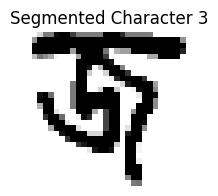

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Segment 3: Predicted class index is 21, Class name is ja
Class probabilities: [[8.0189318e-05 1.0341061e-04 2.9372219e-03 3.7215804e-04 1.3129036e-04
  2.8568954e-04 1.4041689e-04 3.4113089e-04 1.3555797e-04 1.3263163e-04
  2.8088241e-04 2.9161043e-05 1.6240227e-05 1.0384748e-03 8.8202786e-03
  1.0678912e-02 5.9805368e-04 1.0489736e-02 1.6915718e-03 8.2020676e-03
  1.6645161e-03 9.1746747e-01 1.4618455e-03 3.1530471e-03 1.8005572e-02
  4.0656171e-04 2.8727716e-04 1.1898699e-04 2.1907837e-04 4.1658423e-04
  1.0294001e-02]]


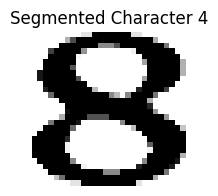

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Segment 4: Predicted class index is 5, Class name is 4
Class probabilities: [[2.33980687e-03 7.00923987e-03 2.82315596e-04 3.45974118e-02
  2.50121281e-02 8.44196200e-01 1.26044108e-02 1.35963000e-02
  1.55262034e-02 2.06272006e-02 1.77430473e-02 2.07757403e-05
  6.90029719e-06 3.63864325e-04 1.83481796e-04 2.21062888e-04
  2.69157055e-04 3.62551509e-04 3.49992682e-04 1.83782377e-03
  3.62992985e-04 5.19751804e-04 2.60007655e-04 3.91380978e-04
  3.55798984e-04 1.20575896e-04 4.26972438e-05 3.19639075e-05
  1.37537019e-04 4.19655291e-04 2.07526216e-04]]


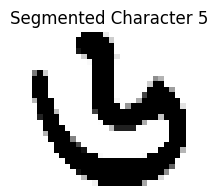

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Segment 5: Predicted class index is 7, Class name is 6
Class probabilities: [[8.5395633e-04 8.2311779e-03 7.4774411e-04 1.8659549e-02 4.7118273e-03
  2.4490781e-02 1.5098099e-02 7.9553282e-01 9.4709331e-03 6.5996371e-02
  4.8087128e-02 2.0613534e-05 2.5566153e-05 3.1923497e-04 6.0031039e-04
  3.4545345e-04 3.1202019e-04 4.7331207e-04 8.7833713e-04 2.1090551e-04
  1.0106703e-03 4.3970355e-04 2.4699784e-04 1.8727613e-04 1.0834158e-03
  3.0385453e-04 2.3854298e-04 9.4278163e-05 2.5039937e-04 6.0219975e-04
  4.7631853e-04]]


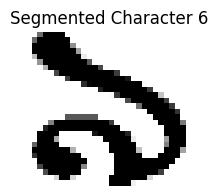

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Segment 6: Predicted class index is 10, Class name is 9
Class probabilities: [[6.3222309e-04 7.8019113e-03 1.6016560e-04 1.1427879e-02 2.5113751e-03
  5.0303512e-03 3.1101948e-03 1.6600260e-03 4.3975362e-03 2.2208467e-03
  9.6043068e-01 9.5930545e-07 6.4689607e-07 3.9216258e-05 6.0811944e-05
  2.2127200e-05 6.0133279e-05 5.1306564e-05 3.3263081e-05 5.2943891e-05
  8.9879897e-05 3.8258047e-05 7.9097053e-06 2.7526037e-05 3.8473045e-05
  1.1826747e-05 2.1921664e-06 2.7409244e-06 5.1073571e-06 2.9928251e-05
  4.1725587e-05]]


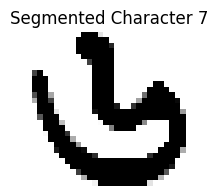

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Segment 7: Predicted class index is 7, Class name is 6
Class probabilities: [[9.66617779e-04 7.44631328e-03 9.59353405e-04 1.61339846e-02
  5.00225136e-03 2.22559925e-02 1.56959631e-02 8.12020361e-01
  9.78037156e-03 5.44294827e-02 4.48270999e-02 2.70828186e-05
  3.02584849e-05 4.49862477e-04 7.80161587e-04 4.77487542e-04
  4.56593552e-04 6.67683082e-04 1.02351571e-03 2.96783401e-04
  1.30568654e-03 4.79222886e-04 3.32537660e-04 2.15224398e-04
  1.47970452e-03 3.69494752e-04 2.74476159e-04 1.05644525e-04
  2.65389011e-04 7.66566838e-04 6.78892597e-04]]
Predicted classes for all segmented characters: ['Dhaka', 'Metro', 'ja', '4', '6', '9', '6']


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the pre-trained model (adjust the path to your .h5 file)
model_path = '/content/drive/MyDrive/LicenseData/thesisModel/Bangla_allFin.h5'
model = load_model(model_path)

# Define the index to class name mapping
index_to_class = {
    0: '0', 1: '1', 2: '10', 3: '2', 4: '3', 5: '4', 6: '5', 7: '6', 8: '7', 9: '8',
    10: '9', 11: 'Dhaka', 12: 'Metro', 13: 'ba', 14: 'ca', 15: 'cha', 16: 'e', 17: 'ga',
    18: 'gha', 19: 'ha', 20: 'i', 21: 'ja', 22: 'jha', 23: 'ka', 24: 'kha', 25: 'khulna',
    26: 'mymensingh', 27: 'narayanganj', 28: 'sylhet', 29: 'ttha', 30: 'u'
}

# Assuming `segmented_characters` is a list containing segmented character images
# Example: segmented_characters = [char1_img, char2_img, ..., charN_img]

# Print the total number of segmented characters
print(f"Total segmented characters: {len(segmented_characters)}")

# Initialize a list to store predictions
predictions = []

# Iterate over all segmented characters
for i, character in enumerate(segmented_characters):
    # Display each segmented character
    plt.figure(figsize=(2, 2))
    plt.imshow(character, cmap='gray')
    plt.title(f"Segmented Character {i + 1}")
    plt.axis('off')
    plt.show()

    # Preprocess the character for the CNN model
    # Resize the image to (64, 64) - adjust size based on your model's expected input dimensions
    resized_character = cv2.resize(character, (64, 64))

    # If the image is grayscale (1 channel), convert to 3-channel RGB
    if len(resized_character.shape) == 2 or resized_character.shape[-1] == 1:
        character_rgb = cv2.cvtColor(resized_character, cv2.COLOR_GRAY2RGB)
    else:
        character_rgb = resized_character

    # Normalize the pixel values to the range [0, 1]
    normalized_character = character_rgb / 255.0

    # Add batch dimension to match model input shape: (1, 64, 64, 3)
    character_input = np.expand_dims(normalized_character, axis=0)

    # Make prediction using the model
    prediction = model.predict(character_input)

    # Interpret the model output (assuming softmax probabilities)
    predicted_class_index = np.argmax(prediction)

    # Get the corresponding class name from the index
    predicted_class_name = index_to_class.get(predicted_class_index, "Unknown")

    # Print the predicted class and probabilities
    print(f"Segment {i + 1}: Predicted class index is {predicted_class_index}, Class name is {predicted_class_name}")
    print(f"Class probabilities: {prediction}")

    # Append the predicted class name to the list
    predictions.append(predicted_class_name)

# Final output of all predictions
print("Predicted classes for all segmented characters:", predictions)


Without GAN

Detected light background. Proceeding without inversion.


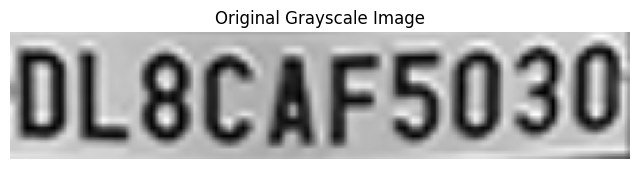

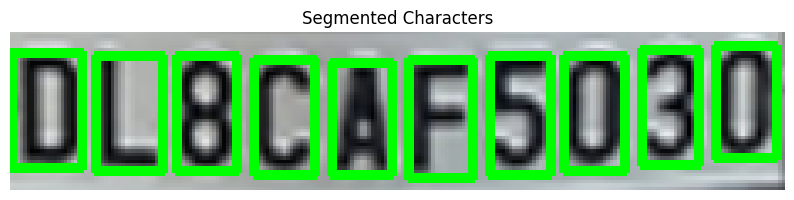

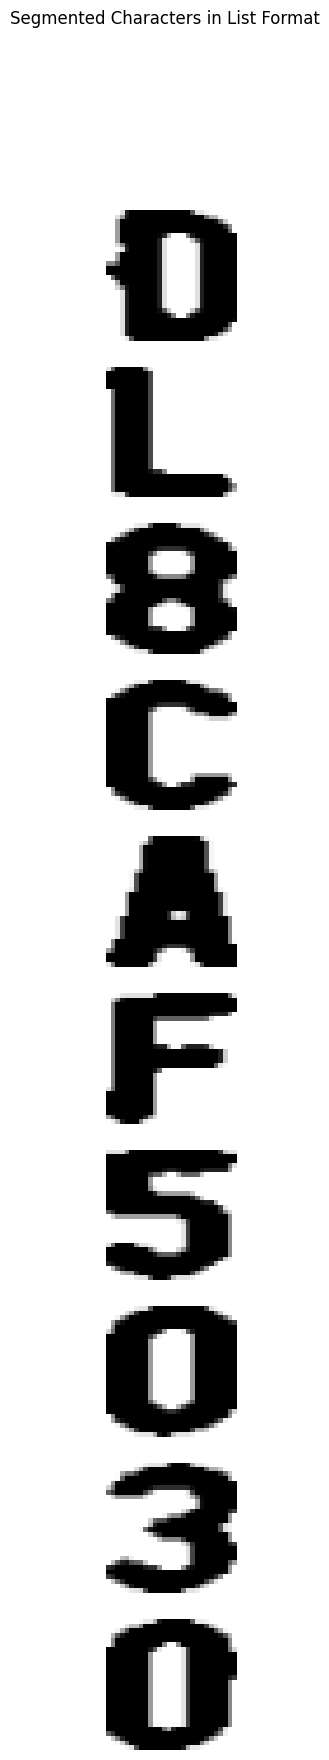

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import functools

# Load the image from the provided path
image_path = '/content/eng.PNG'  # Update this path to your image location
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image from {image_path}")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Check the background intensity to determine whether to invert
    bg_intensity = np.mean(gray[:10, :10])  # Average intensity of the top-left corner

    # Invert the image if the background is dark
    if bg_intensity < 127:
        print("Detected dark background. Inverting colors.")
        gray = cv2.bitwise_not(gray)

        # Show the inverted grayscale image
        plt.figure(figsize=(8, 6))
        plt.imshow(gray, cmap='gray')
        plt.title('Inverted Grayscale Image')
        plt.axis('off')
        plt.show()
    else:
        print("Detected light background. Proceeding without inversion.")

        # Show the original grayscale image
        plt.figure(figsize=(8, 6))
        plt.imshow(gray, cmap='gray')
        plt.title('Original Grayscale Image')
        plt.axis('off')
        plt.show()

    # Apply Gaussian blurring to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding to get binary image
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 15)

    # Perform connected components analysis on the thresholded image
    _, labels = cv2.connectedComponents(thresh)
    mask = np.zeros(thresh.shape, dtype="uint8")

    # Set lower and upper bound criteria for character sizes
    total_pixels = image.shape[0] * image.shape[1]
    lower = total_pixels // 150  # Increased lower bound for smaller characters
    upper = total_pixels // 10   # Increased upper bound for larger characters

    # Loop over the unique components and filter them based on pixel count
    for (i, label) in enumerate(np.unique(labels)):
        if label == 0:
            continue

        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)

        if numPixels > lower and numPixels < upper:
            mask = cv2.add(mask, labelMask)

    # Find contours and get bounding boxes
    cnts, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]

    # Sort bounding boxes from left to right and top to bottom
    def compare(rect1, rect2):
        if abs(rect1[1] - rect2[1]) > 15:
            return rect1[1] - rect2[1]
        else:
            return rect1[0] - rect2[0]

    boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare))

    # Draw bounding boxes on the image
    for (x, y, w, h) in boundingBoxes:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the original image with bounding boxes
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Characters')
    plt.axis('off')
    plt.show()

    # Extract, invert and store each segmented character in a list
    segmented_characters = []
    for (x, y, w, h) in boundingBoxes:
        char_img = thresh[y:y+h, x:x+w]

        # Ensure background is white and character is black
        inverted_char = cv2.bitwise_not(char_img)

        # Resize to uniform dimensions if necessary (e.g., 28x28 for ML models)
        resized_char = cv2.resize(inverted_char, (28, 28))

        segmented_characters.append(resized_char)

    # Display each segmented character individually in a list format
    plt.figure(figsize=(5, 2 * len(segmented_characters)))
    for i, img in enumerate(segmented_characters):
        plt.subplot(len(segmented_characters), 1, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle('Segmented Characters in List Format')
    plt.show()

    # segmented_characters now contains each character as an isolated black-on-white image for further comparison


Total segmented characters: 10


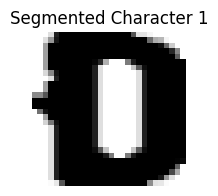

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step


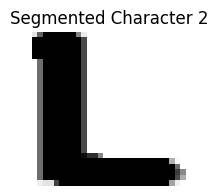

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


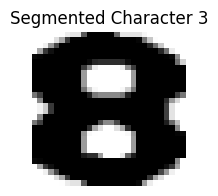

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


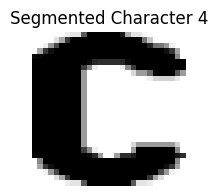

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


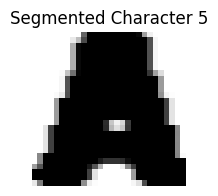

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


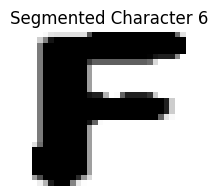

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


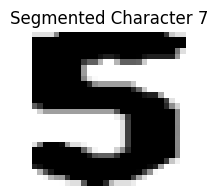

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


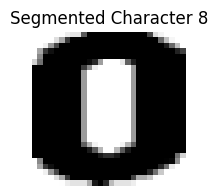

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


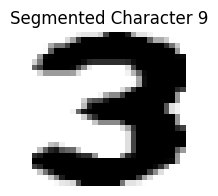

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


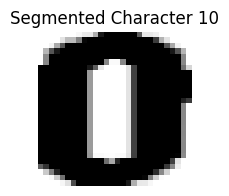

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Segment 1: Predicted class is 'eng_0' (Index: 26)
Class probabilities: [[6.2221574e-05 5.2237697e-02 1.9639414e-02 1.4434372e-01 1.2106849e-05
  8.3578379e-05 1.8001867e-04 3.7852256e-05 8.4357933e-05 1.4347662e-04
  1.7452003e-04 1.5825201e-04 2.4617033e-03 8.1435172e-04 3.5416789e-02
  1.0970645e-03 3.8777106e-03 7.0653125e-03 2.5674910e-04 1.5061925e-03
  4.7288099e-04 4.9139495e-04 8.0390839e-04 6.5662852e-04 4.5082033e-05
  1.6957985e-05 7.1427798e-01 6.4562443e-03 7.7467173e-04 7.7150401e-04
  8.0292695e-04 1.1066741e-04 1.2898870e-03 1.1856575e-04 1.2027972e-03
  2.0548352e-03]]

Segment 2: Predicted class is 'L' (Index: 11)
Class probabilities: [[1.8917030e-04 1.0361487e-04 5.2638720e-03 2.8011363e-04 2.9012020e-04
  2.3826612e-04 1.1408542e-04 4.2974843e-05 4.2702272e-03 9.7064869e-03
  6.0116994e-04 9.5899957e-01 1.1379128e-04 6.1399318e-05 2.9563246e-04
  4.0519706e-04 3.8338912e-04 2.0824496e-04 1.1432613e-04 1.5602287e-04
  6.5492541e-

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the pre-trained model (adjust the path to your .h5 file)
model_path = '/content/drive/MyDrive/LicenseData/bangla_recog/twoBangDataset/balancedDataset/nmy_english_all.h5'
# model_path = '/content/drive/MyDrive/LicenseData/EngAll/frengAll.h5'
model = load_model(model_path)

# New class index to name mapping
index_to_class = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
    20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'eng_0', 27: '1',
    28: '2', 29: '3', 30: '4', 31: '5', 32: '6', 33: '7',
    34: '8', 35: '9'
}

# Assuming `segmented_characters` is a list containing segmented character images
# Example: segmented_characters = [char1_img, char2_img, ..., charN_img]

# Print the total number of segmented characters
print(f"Total segmented characters: {len(segmented_characters)}")

# Initialize a list to store predictions
predictions = []

# Initialize a string to hold all the results in the desired format
result_string = ""

# Iterate over all segmented characters
for i, character in enumerate(segmented_characters):
    # Display each segmented character
    plt.figure(figsize=(2, 2))
    plt.imshow(character, cmap='gray')
    plt.title(f"Segmented Character {i + 1}")
    plt.axis('off')
    plt.show()

    # Preprocess the character for the CNN model
    # Resize the image to (64, 64) - adjust size based on your model's expected input dimensions
    resized_character = cv2.resize(character, (64, 64))

    # If the image is grayscale (1 channel), convert to 3-channel RGB
    if len(resized_character.shape) == 2 or resized_character.shape[-1] == 1:
        character_rgb = cv2.cvtColor(resized_character, cv2.COLOR_GRAY2RGB)
    else:
        character_rgb = resized_character

    # Normalize the pixel values to the range [0, 1]
    normalized_character = character_rgb / 255.0

    # Add batch dimension to match model input shape: (1, 64, 64, 3)
    character_input = np.expand_dims(normalized_character, axis=0)

    # Make prediction using the model
    prediction = model.predict(character_input)

    # Interpret the model output (assuming softmax probabilities)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = index_to_class[predicted_class_index]

    # Prepare the result for this segment
    result_string += f"Segment {i + 1}: Predicted class is '{predicted_class_name}' (Index: {predicted_class_index})\n"
    result_string += f"Class probabilities: {prediction}\n\n"

    # Append the prediction to the list
    predictions.append(predicted_class_name)

# Final output of all predictions in string format
result_string += "Predicted classes for all segmented characters:\n"
result_string += str(predictions)

# Print the final result string
print(result_string)


Gan Enhanced

Detected light background. Proceeding without inversion.


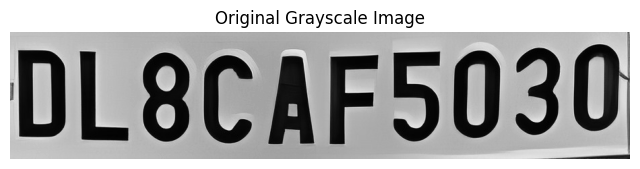

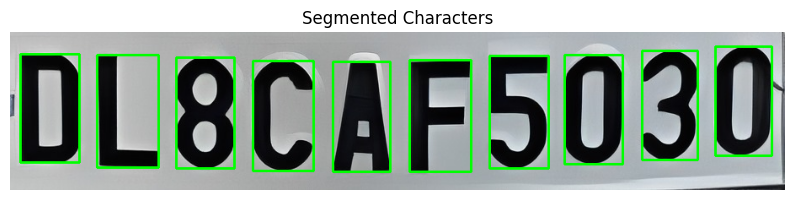

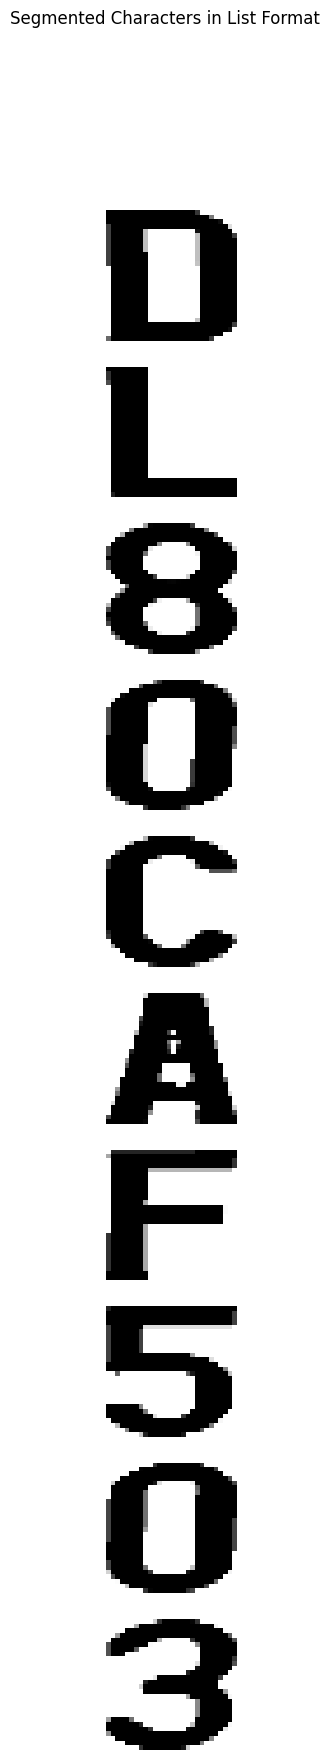

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import functools

# Load the image from the provided path
image_path = '/content/engen.jpg'  # Update this path to your image location
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image from {image_path}")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Check the background intensity to determine whether to invert
    bg_intensity = np.mean(gray[:10, :10])  # Average intensity of the top-left corner

    # Invert the image if the background is dark
    if bg_intensity < 127:
        print("Detected dark background. Inverting colors.")
        gray = cv2.bitwise_not(gray)

        # Show the inverted grayscale image
        plt.figure(figsize=(8, 6))
        plt.imshow(gray, cmap='gray')
        plt.title('Inverted Grayscale Image')
        plt.axis('off')
        plt.show()
    else:
        print("Detected light background. Proceeding without inversion.")

        # Show the original grayscale image
        plt.figure(figsize=(8, 6))
        plt.imshow(gray, cmap='gray')
        plt.title('Original Grayscale Image')
        plt.axis('off')
        plt.show()

    # Apply Gaussian blurring to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding to get binary image
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 15)

    # Perform connected components analysis on the thresholded image
    _, labels = cv2.connectedComponents(thresh)
    mask = np.zeros(thresh.shape, dtype="uint8")

    # Set lower and upper bound criteria for character sizes
    total_pixels = image.shape[0] * image.shape[1]
    lower = total_pixels // 150  # Increased lower bound for smaller characters
    upper = total_pixels // 10   # Increased upper bound for larger characters

    # Loop over the unique components and filter them based on pixel count
    for (i, label) in enumerate(np.unique(labels)):
        if label == 0:
            continue

        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)

        if numPixels > lower and numPixels < upper:
            mask = cv2.add(mask, labelMask)

    # Find contours and get bounding boxes
    cnts, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]

    # Sort bounding boxes from left to right and top to bottom
    def compare(rect1, rect2):
        if abs(rect1[1] - rect2[1]) > 15:
            return rect1[1] - rect2[1]
        else:
            return rect1[0] - rect2[0]

    boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare))

    # Draw bounding boxes on the image
    for (x, y, w, h) in boundingBoxes:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the original image with bounding boxes
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Characters')
    plt.axis('off')
    plt.show()

    # Extract, invert and store each segmented character in a list
    segmented_characters = []
    for (x, y, w, h) in boundingBoxes:
        char_img = thresh[y:y+h, x:x+w]

        # Ensure background is white and character is black
        inverted_char = cv2.bitwise_not(char_img)

        # Resize to uniform dimensions if necessary (e.g., 28x28 for ML models)
        resized_char = cv2.resize(inverted_char, (28, 28))

        segmented_characters.append(resized_char)

    # Display each segmented character individually in a list format
    plt.figure(figsize=(5, 2 * len(segmented_characters)))
    for i, img in enumerate(segmented_characters):
        plt.subplot(len(segmented_characters), 1, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle('Segmented Characters in List Format')
    plt.show()

    # segmented_characters now contains each character as an isolated black-on-white image for further comparison


Total segmented characters: 10


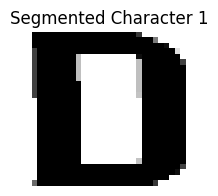

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step


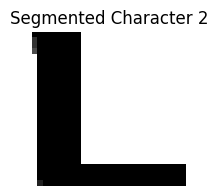

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


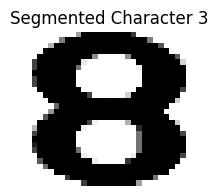

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


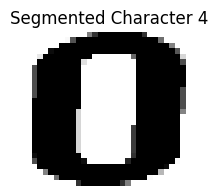

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


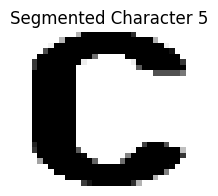

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


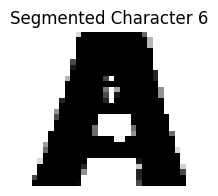

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


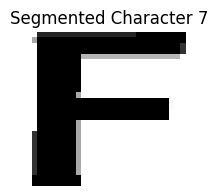

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


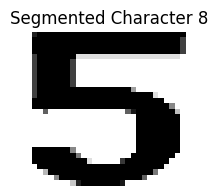

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


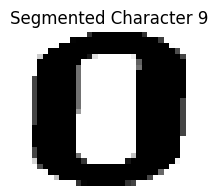

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


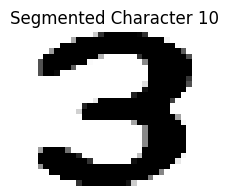

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Segment 1: Predicted class is 'D' (Index: 3)
Class probabilities: [[3.3170298e-05 1.3940601e-03 1.0946539e-03 8.6635637e-01 1.9405237e-05
  3.5929079e-05 2.0734669e-05 7.8363249e-05 1.3450714e-04 5.7165311e-05
  1.7309493e-04 3.8945471e-04 1.4241552e-04 5.0817436e-04 6.2283140e-04
  2.8294281e-04 1.4407489e-03 5.1000813e-04 7.6022341e-05 2.0521882e-04
  4.6017472e-04 1.0904054e-03 1.6850873e-04 6.7970157e-04 5.2112064e-06
  3.4843688e-05 1.1048166e-01 1.1830185e-02 1.8932691e-04 3.0260020e-05
  5.4994720e-04 3.0049945e-05 3.8627436e-04 1.3958999e-04 1.3396511e-04
  2.1456351e-04]]

Segment 2: Predicted class is 'L' (Index: 11)
Class probabilities: [[7.5619300e-06 1.1530192e-05 5.2882660e-05 1.7366539e-05 3.2561955e-05
  8.0492873e-06 5.2031096e-06 2.8384995e-06 3.4036881e-03 1.7981176e-04
  3.2559437e-05 9.9501896e-01 7.6353963e-06 1.9380473e-06 1.1093248e-05
  1.8314755e-05 2.0290458e-05 1.0131938e-05 1.8086722e-06 8.9408422e-06
  2.3530316e-07 1.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the pre-trained model (adjust the path to your .h5 file)
model_path = '/content/drive/MyDrive/LicenseData/bangla_recog/twoBangDataset/balancedDataset/nmy_english_all.h5'
# model_path = '/content/drive/MyDrive/LicenseData/EngAll/frengAll.h5'
model = load_model(model_path)

# New class index to name mapping
index_to_class = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
    20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: '0', 27: '1',
    28: '2', 29: '3', 30: '4', 31: '5', 32: '6', 33: '7',
    34: '8', 35: '9'
}

# Assuming `segmented_characters` is a list containing segmented character images
# Example: segmented_characters = [char1_img, char2_img, ..., charN_img]

# Print the total number of segmented characters
print(f"Total segmented characters: {len(segmented_characters)}")

# Initialize a list to store predictions
predictions = []

# Initialize a string to hold all the results in the desired format
result_string = ""

# Iterate over all segmented characters
for i, character in enumerate(segmented_characters):
    # Display each segmented character
    plt.figure(figsize=(2, 2))
    plt.imshow(character, cmap='gray')
    plt.title(f"Segmented Character {i + 1}")
    plt.axis('off')
    plt.show()

    # Preprocess the character for the CNN model
    # Resize the image to (64, 64) - adjust size based on your model's expected input dimensions
    resized_character = cv2.resize(character, (64, 64))

    # If the image is grayscale (1 channel), convert to 3-channel RGB
    if len(resized_character.shape) == 2 or resized_character.shape[-1] == 1:
        character_rgb = cv2.cvtColor(resized_character, cv2.COLOR_GRAY2RGB)
    else:
        character_rgb = resized_character

    # Normalize the pixel values to the range [0, 1]
    normalized_character = character_rgb / 255.0

    # Add batch dimension to match model input shape: (1, 64, 64, 3)
    character_input = np.expand_dims(normalized_character, axis=0)

    # Make prediction using the model
    prediction = model.predict(character_input)

    # Interpret the model output (assuming softmax probabilities)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = index_to_class[predicted_class_index]

    # Prepare the result for this segment
    result_string += f"Segment {i + 1}: Predicted class is '{predicted_class_name}' (Index: {predicted_class_index})\n"
    result_string += f"Class probabilities: {prediction}\n\n"

    # Append the prediction to the list
    predictions.append(predicted_class_name)

# Final output of all predictions in string format
result_string += "Predicted classes for all segmented characters:\n"
result_string += str(predictions)

# Print the final result string
print(result_string)


**Modified With new model**

Detected light background. Proceeding without inversion.


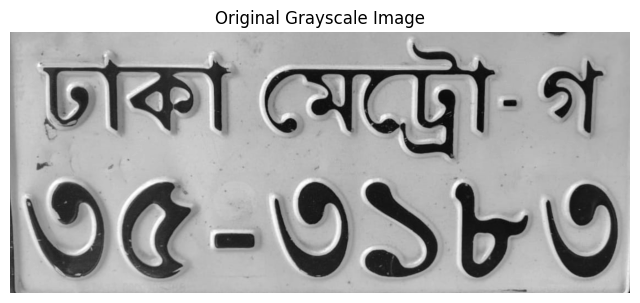

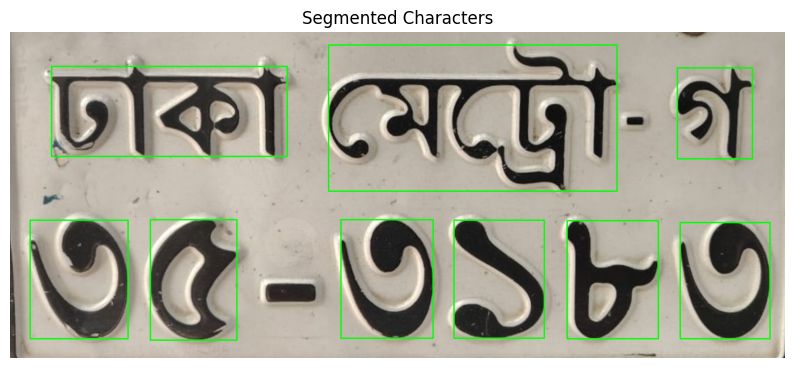

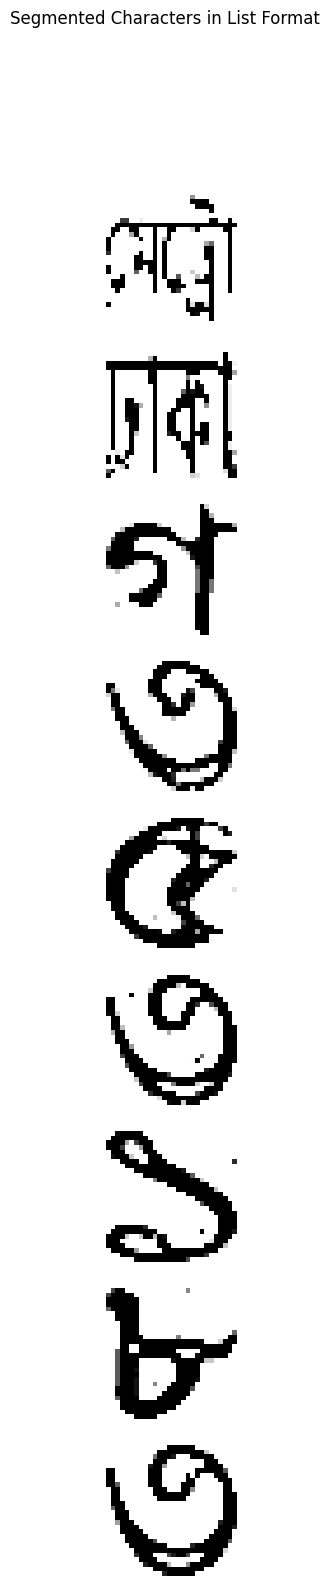

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import functools

# Load the image from the provided path
image_path = '/content/k.PNG'  # Update this path to your image location
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image from {image_path}")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Check the background intensity to determine whether to invert
    bg_intensity = np.mean(gray[:10, :10])  # Average intensity of the top-left corner

    # Invert the image if the background is dark
    if bg_intensity < 127:
        print("Detected dark background. Inverting colors.")
        gray = cv2.bitwise_not(gray)

        # Show the inverted grayscale image
        plt.figure(figsize=(8, 6))
        plt.imshow(gray, cmap='gray')
        plt.title('Inverted Grayscale Image')
        plt.axis('off')
        plt.show()
    else:
        print("Detected light background. Proceeding without inversion.")

        # Show the original grayscale image
        plt.figure(figsize=(8, 6))
        plt.imshow(gray, cmap='gray')
        plt.title('Original Grayscale Image')
        plt.axis('off')
        plt.show()

    # Apply Gaussian blurring to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding to get binary image
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 15)

    # Perform connected components analysis on the thresholded image
    _, labels = cv2.connectedComponents(thresh)
    mask = np.zeros(thresh.shape, dtype="uint8")

    # Set lower and upper bound criteria for character sizes
    total_pixels = image.shape[0] * image.shape[1]
    lower = total_pixels // 150  # Increased lower bound for smaller characters
    upper = total_pixels // 10   # Increased upper bound for larger characters

    # Loop over the unique components and filter them based on pixel count
    for (i, label) in enumerate(np.unique(labels)):
        if label == 0:
            continue

        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)

        if numPixels > lower and numPixels < upper:
            mask = cv2.add(mask, labelMask)

    # Find contours and get bounding boxes
    cnts, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]

    # Sort bounding boxes from left to right and top to bottom
    def compare(rect1, rect2):
        if abs(rect1[1] - rect2[1]) > 15:
            return rect1[1] - rect2[1]
        else:
            return rect1[0] - rect2[0]

    boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare))

    # Draw bounding boxes on the image
    for (x, y, w, h) in boundingBoxes:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the original image with bounding boxes
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Characters')
    plt.axis('off')
    plt.show()

    # Extract, invert and store each segmented character in a list
    segmented_characters = []
    for (x, y, w, h) in boundingBoxes:
        char_img = thresh[y:y+h, x:x+w]

        # Ensure background is white and character is black
        inverted_char = cv2.bitwise_not(char_img)

        # Resize to uniform dimensions if necessary (e.g., 28x28 for ML models)
        resized_char = cv2.resize(inverted_char, (28, 28))

        segmented_characters.append(resized_char)

    # Display each segmented character individually in a list format
    plt.figure(figsize=(5, 2 * len(segmented_characters)))
    for i, img in enumerate(segmented_characters):
        plt.subplot(len(segmented_characters), 1, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle('Segmented Characters in List Format')
    plt.show()

    # segmented_characters now contains each character as an isolated black-on-white image for further comparison


In [ ]:

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Total segmented characters: 9


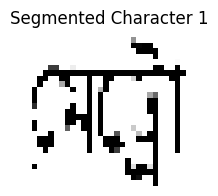

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
Segment 1: Predicted class index is 11, Class name is Metro
Class probabilities: [[1.9047149e-16 4.2402469e-16 1.8472219e-13 3.5044964e-16 1.1528434e-14
  1.5053238e-15 2.5773718e-14 8.0486133e-13 4.3160205e-11 4.0020380e-13
  7.0832554e-14 1.0000000e+00 1.5759232e-12 5.2235749e-13 1.6252916e-15
  2.1265477e-14 4.1520145e-11 7.5587991e-12 1.7084643e-15 1.1112526e-15
  1.2278873e-16 7.1790088e-14 3.6704844e-11 2.7231521e-13 4.8748430e-14
  6.8282617e-15 2.3397381e-14 1.1737363e-12 1.1708319e-12 4.6838564e-13
  1.8406731e-13]]


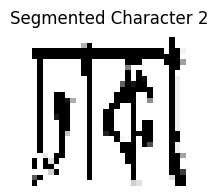

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Segment 2: Predicted class index is 10, Class name is Dhaka
Class probabilities: [[1.5123305e-08 1.2033371e-07 3.7710999e-09 1.9074196e-08 2.9592602e-08
  2.1989258e-08 1.3276745e-09 5.7552246e-08 1.4631091e-07 2.7603392e-08
  9.9998248e-01 1.0151812e-05 2.1398666e-08 1.7972802e-08 1.1480760e-08
  9.8780106e-08 7.0900970e-09 3.2902111e-08 3.8758530e-09 3.3250398e-09
  9.2208346e-08 5.5050932e-06 3.8020329e-07 3.9927905e-08 2.3183097e-07
  1.7652932e-08 1.7869743e-08 1.2069867e-08 2.9387735e-07 3.8579252e-08
  7.1291275e-08]]


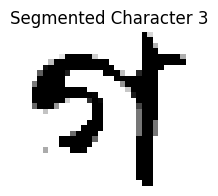

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Segment 3: Predicted class index is 16, Class name is ga
Class probabilities: [[1.09278968e-08 2.58414991e-11 3.87074328e-09 5.46056811e-10
  2.16759100e-09 5.88401718e-08 3.36410677e-10 1.41308290e-08
  2.60782551e-09 2.82288539e-07 3.56263595e-11 1.88341645e-08
  7.00513851e-08 8.39192005e-09 6.53647858e-10 2.94712930e-08
  9.99998450e-01 4.55816318e-09 2.61356692e-09 4.93436438e-08
  5.78974291e-09 1.75716408e-09 8.43845100e-07 6.84789114e-08
  1.13781307e-09 1.10336016e-08 7.31240068e-10 7.75266074e-09
  8.47548143e-10 9.11956066e-10 1.10017315e-10]]


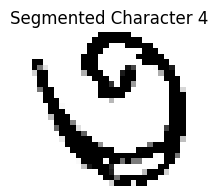

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Segment 4: Predicted class index is 3, Class name is 3
Class probabilities: [[4.0283267e-05 2.4231616e-07 1.9243826e-07 9.9969590e-01 6.3289822e-06
  1.1780660e-05 3.6601388e-05 2.1240617e-06 2.1392332e-06 1.9896965e-05
  5.0380595e-07 6.6442158e-07 1.3861134e-06 6.4041419e-06 5.4415273e-07
  2.8390104e-05 6.7831270e-06 2.2106785e-06 6.6016139e-07 1.0251870e-07
  6.7559927e-06 1.1707082e-06 9.2277969e-06 1.3687333e-06 7.1158075e-07
  4.4007612e-07 5.9863072e-07 1.1155508e-04 2.8525135e-06 3.1051107e-07
  1.8014750e-06]]


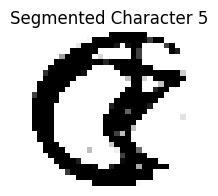

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Segment 5: Predicted class index is 5, Class name is 5
Class probabilities: [[1.8532762e-07 4.4113893e-08 1.8456284e-07 4.5402540e-08 1.2152054e-05
  9.9997509e-01 7.5177212e-08 1.6717834e-08 5.6281264e-09 4.4101860e-08
  2.5883888e-09 1.0037010e-08 6.9897602e-08 5.8635208e-09 6.1436514e-09
  3.0312876e-08 1.2493734e-07 1.6468968e-09 2.4449534e-07 2.7643374e-09
  1.4984860e-07 7.1333153e-09 3.0144562e-07 8.3102840e-09 9.7970627e-09
  6.3203216e-09 3.2886369e-08 4.2480655e-09 6.6408061e-09 1.1151819e-05
  2.0609725e-09]]


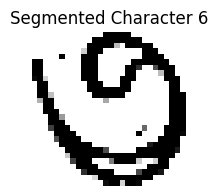

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Segment 6: Predicted class index is 3, Class name is 3
Class probabilities: [[2.8372218e-05 3.9692748e-07 2.6720244e-07 9.9944919e-01 6.7405094e-06
  3.4292003e-05 1.6477171e-04 2.3151615e-06 1.9653187e-06 4.3272867e-05
  7.6223199e-07 6.0499229e-07 2.0483731e-06 9.7264410e-06 4.6784879e-07
  5.0343915e-05 8.7564067e-06 1.9241547e-06 1.1856612e-06 1.4683617e-07
  2.1606607e-05 2.3407172e-06 1.6956212e-05 3.4227326e-06 1.2248204e-06
  8.2616970e-07 9.7771863e-07 1.3720623e-04 4.4066651e-06 5.3228302e-07
  2.9795099e-06]]


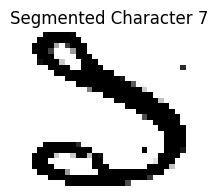

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Segment 7: Predicted class index is 1, Class name is 1
Class probabilities: [[4.26334566e-07 9.98994172e-01 5.87502063e-06 1.16466275e-07
  1.44571111e-08 6.58493988e-08 4.54992382e-08 5.34159517e-06
  6.14519558e-06 9.84671758e-04 2.14294760e-09 4.19433555e-09
  8.46045793e-08 2.21445191e-07 4.24038866e-08 1.06498248e-06
  2.72097029e-08 3.72056590e-08 1.23197506e-08 5.30577848e-09
  7.42666484e-10 1.84437638e-08 4.07902334e-08 3.31949437e-08
  1.75212136e-07 4.55313369e-07 2.63338308e-07 7.50385993e-08
  4.22221206e-07 1.79481148e-07 2.72477703e-08]]


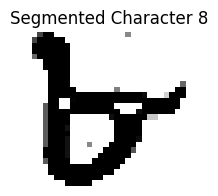

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Segment 8: Predicted class index is 8, Class name is 8
Class probabilities: [[3.18487966e-12 3.47124759e-12 2.10517218e-13 4.05168650e-12
  5.01746457e-11 2.25610031e-13 9.15637531e-12 1.43677248e-09
  1.00000000e+00 3.78346035e-11 6.22849992e-12 5.35599065e-10
  1.42921100e-11 1.69337842e-08 8.86640674e-12 2.29803468e-11
  1.38065965e-11 9.97785410e-10 5.30125206e-13 3.72161243e-12
  4.31353900e-13 1.30579046e-13 6.06347472e-10 5.95447788e-11
  5.06939690e-16 5.85261277e-14 5.25778622e-11 9.64699098e-10
  1.22284205e-11 3.07717712e-10 2.50848699e-11]]


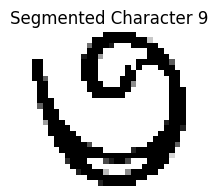

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Segment 9: Predicted class index is 3, Class name is 3
Class probabilities: [[3.0118304e-06 4.2033502e-08 1.3304813e-08 9.9993086e-01 9.7764428e-07
  3.2579380e-06 3.4830005e-05 2.8897981e-07 2.6962866e-07 3.7135353e-06
  3.6398411e-08 4.0092971e-08 1.5127596e-07 1.2318703e-06 2.6717252e-08
  5.3760032e-06 1.0740262e-06 2.0232962e-07 6.6246393e-08 1.0178144e-08
  1.1278670e-06 1.5315888e-07 1.5544258e-06 2.1560747e-07 6.0608066e-08
  4.5520014e-08 7.2343262e-08 1.0819476e-05 3.2955634e-07 2.9903362e-08
  1.7976768e-07]]
Predicted classes for all segmented characters: ['Metro', 'Dhaka', 'ga', '3', '5', '3', '1', '8', '3']


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the pre-trained model (adjust the path to your .h5 file)
model_path = '/content/drive/MyDrive/LicenseData/FinalNewBangla.h5'
model = load_model(model_path)

# Define the index to class name mapping
index_to_class = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'Dhaka', 11: 'Metro', 12: 'ba', 13: 'ca', 14: 'cha', 15: 'e', 16: 'ga',
    17: 'gha', 18: 'ha', 19: 'i', 20: 'ja', 21: 'jha', 22: 'ka', 23: 'kha',
    24: 'khulna', 25: 'mymensingh', 26: 'narayanganj', 27: 'o', 28: 'sylhet',
    29: 'ttha', 30: 'u'
}

# Assuming `segmented_characters` is a list containing segmented character images
# Example: segmented_characters = [char1_img, char2_img, ..., charN_img]

# Print the total number of segmented characters
print(f"Total segmented characters: {len(segmented_characters)}")

# Initialize a list to store predictions
predictions = []

# Iterate over all segmented characters
for i, character in enumerate(segmented_characters):
    # Display each segmented character
    plt.figure(figsize=(2, 2))
    plt.imshow(character, cmap='gray')
    plt.title(f"Segmented Character {i + 1}")
    plt.axis('off')
    plt.show()

    # Preprocess the character for the CNN model
    # Resize the image to (64, 64) - adjust size based on your model's expected input dimensions
    resized_character = cv2.resize(character, (64, 64))

    # If the image is grayscale (1 channel), convert to 3-channel RGB
    if len(resized_character.shape) == 2 or resized_character.shape[-1] == 1:
        character_rgb = cv2.cvtColor(resized_character, cv2.COLOR_GRAY2RGB)
    else:
        character_rgb = resized_character

    # Normalize the pixel values to the range [0, 1]
    normalized_character = character_rgb / 255.0

    # Add batch dimension to match model input shape: (1, 64, 64, 3)
    character_input = np.expand_dims(normalized_character, axis=0)

    # Make prediction using the model
    prediction = model.predict(character_input)

    # Interpret the model output (assuming softmax probabilities)
    predicted_class_index = np.argmax(prediction)

    # Get the corresponding class name from the index
    predicted_class_name = index_to_class.get(predicted_class_index, "Unknown")

    # Print the predicted class and probabilities
    print(f"Segment {i + 1}: Predicted class index is {predicted_class_index}, Class name is {predicted_class_name}")
    print(f"Class probabilities: {prediction}")

    # Append the predicted class name to the list
    predictions.append(predicted_class_name)

# Final output of all predictions
print("Predicted classes for all segmented characters:", predictions)
